# DAI-Assignment

##### **Name**:- *Ginjala Srivardhan*
##### **Enrollment number**:- *23114028*
##### **Batch**:- *CS1*

### Tasks:-

**1. Data Cleaning:**
- Load the dataset and inspect its structure.
- Handle missing values using imputation or removal techniques.
- Identify and remove duplicate records.
- Detect and treat outliers using appropriate statistical methods.
- Standardize categorical values (e.g., fixing typos or formatting inconsistencies).


**2. EDA**
##### *Univariate Analysis (Single-Variable Exploration)*
- Summary statistics (mean, median, mode, variance, skewness, etc.).
- Frequency distributions for categorical variables.
- Histograms and box plots to visualize distributions.
##### *Bivariate Analysis (Two-Variable Exploration)*
- Correlation matrix to identify relationships between numerical variables.
- Scatter plots for continuous variable relationships.
- Bar plots, violin plots, and box plots to compare categorical and numerical variables.
##### *Multivariate Analysis (Multiple Variables Exploration)*
- Pair plots to analyze multiple relationships simultaneously.
- Heatmaps to visualize correlations among multiple variables.
- Grouped comparisons to identify combined effects of multiple features.

### ***Dataset chosen:- NBA Players dataset***

<img src="https://hoopshype.com/wp-content/uploads/sites/92/2024/08/78_best_nba2.png?resize=1000,600E" width="504">

##### Dataset Source:- https://www.kaggle.com/datasets/justinas/nba-players-data

In [1]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data:- 

df = pd.read_csv('all_seasons.csv')
df.head()

Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  

[5 rows x 22 columns]

In [3]:
# Check the shape of the data
df.shape

(12844, 22)

In [4]:
# Let's create a copy of the data so that we can work on it without affecting the original data
df_copy = df.copy()

In [5]:
# Let's remove the Unnamed: 0 column as it is not required
df_copy = df_copy.drop('Unnamed: 0', axis=1)

In [6]:
# Inspect the data:-

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

In [7]:
# Observe the data:-
df_copy.describe()

age  player_height  player_weight            gp           pts  \
count  12844.000000   12844.000000   12844.000000  12844.000000  12844.000000   
mean      27.045313     200.555097     100.263279     51.154158      8.212582   
std        4.339211       9.111090      12.426628     25.084904      6.016573   
min       18.000000     160.020000      60.327736      1.000000      0.000000   
25%       24.000000     193.040000      90.718400     31.000000      3.600000   
50%       26.000000     200.660000      99.790240     57.000000      6.700000   
75%       30.000000     208.280000     108.862080     73.000000     11.500000   
max       44.000000     231.140000     163.293120     85.000000     36.100000   

                reb           ast    net_rating      oreb_pct      dreb_pct  \
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000   
mean       3.558486      1.824681     -2.226339      0.054073      0.140646   
std        2.477885      1.800840     12.665124      0.043335      0.062513   
min        0.000000      0.000000   -250.000000      0.000000      0.000000   
25%        1.800000      0.600000     -6.400000      0.021000      0.096000   
50%        3.000000      1.200000     -1.300000      0.040000      0.130500   
75%        4.700000      2.400000      3.200000      0.083000      0.179000   
max       16.300000     11.700000    300.000000      1.000000      1.000000   

            usg_pct        ts_pct       ast_pct  
count  12844.000000  12844.000000  12844.000000  
mean       0.184641      0.513138      0.131595  
std        0.053545      0.101724      0.094172  
min        0.000000      0.000000      0.000000  
25%        0.149000      0.482000      0.066000  
50%        0.181000      0.525000      0.103000  
75%        0.217000      0.563000      0.179000  
max        1.000000      1.500000      1.000000

In [8]:
# Check the number of unique values in each column:-
df_copy.nunique().sort_values()

draft_round             9
age                    27
season                 27
player_height          30
team_abbreviation      36
draft_year             48
draft_number           76
country                82
gp                     85
ast                   115
reb                   153
player_weight         157
oreb_pct              216
pts                   319
usg_pct               348
dreb_pct              352
college               356
ast_pct               483
ts_pct                563
net_rating            772
player_name          2551
dtype: int64

In [9]:
# Identify the columns with missing values, and print the percentage of missing values in each column:-
missing_values = df_copy.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = missing_values / len(df_copy) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values_table = missing_values_table.sort_values(by='% of Total Values', ascending=False)
print(missing_values_table)

         Missing Values  % of Total Values
college            1854          14.434756


In [10]:
# Let's handle the missing values:-
# Since the missing values are more than 5%, we can fill them with the:-
# - Mean value for the numerical columns
# - Mode value for the categorical column
# Here, we choose not to drop the missing values, considering the size of the dataset, and information loss involved.
# Also, since there is only one categorical column 'college' with missing values, we can fill it with the mode value.
# Although the numerical columns do not have missing values, we will fill them with the mean value for demonstration purposes.

# Separate the numerical and categorical columns:-
num_cols = df_copy.select_dtypes(include=np.number).columns
cat_cols = df_copy.select_dtypes(exclude=np.number).columns

# Fill the missing values in numerical columns with the mean value:-
df_copy[num_cols] = df_copy[num_cols].fillna(df_copy[num_cols].mean())

# Fill the missing values in categorical columns with the mode value:-
df_copy[cat_cols] = df_copy[cat_cols].fillna(df_copy[cat_cols].mode().iloc[0])

# Check for missing values:-
df_copy.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [11]:
# Let's identify and remove the duplicate rows:-
# Check for duplicate rows:-

duplicate_rows_df = df_copy[df_copy.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape) # Number of duplicate rows:  (0, 7)

# Clearly, there are no duplicate rows in the dataset.

Number of duplicate rows:  (0, 21)


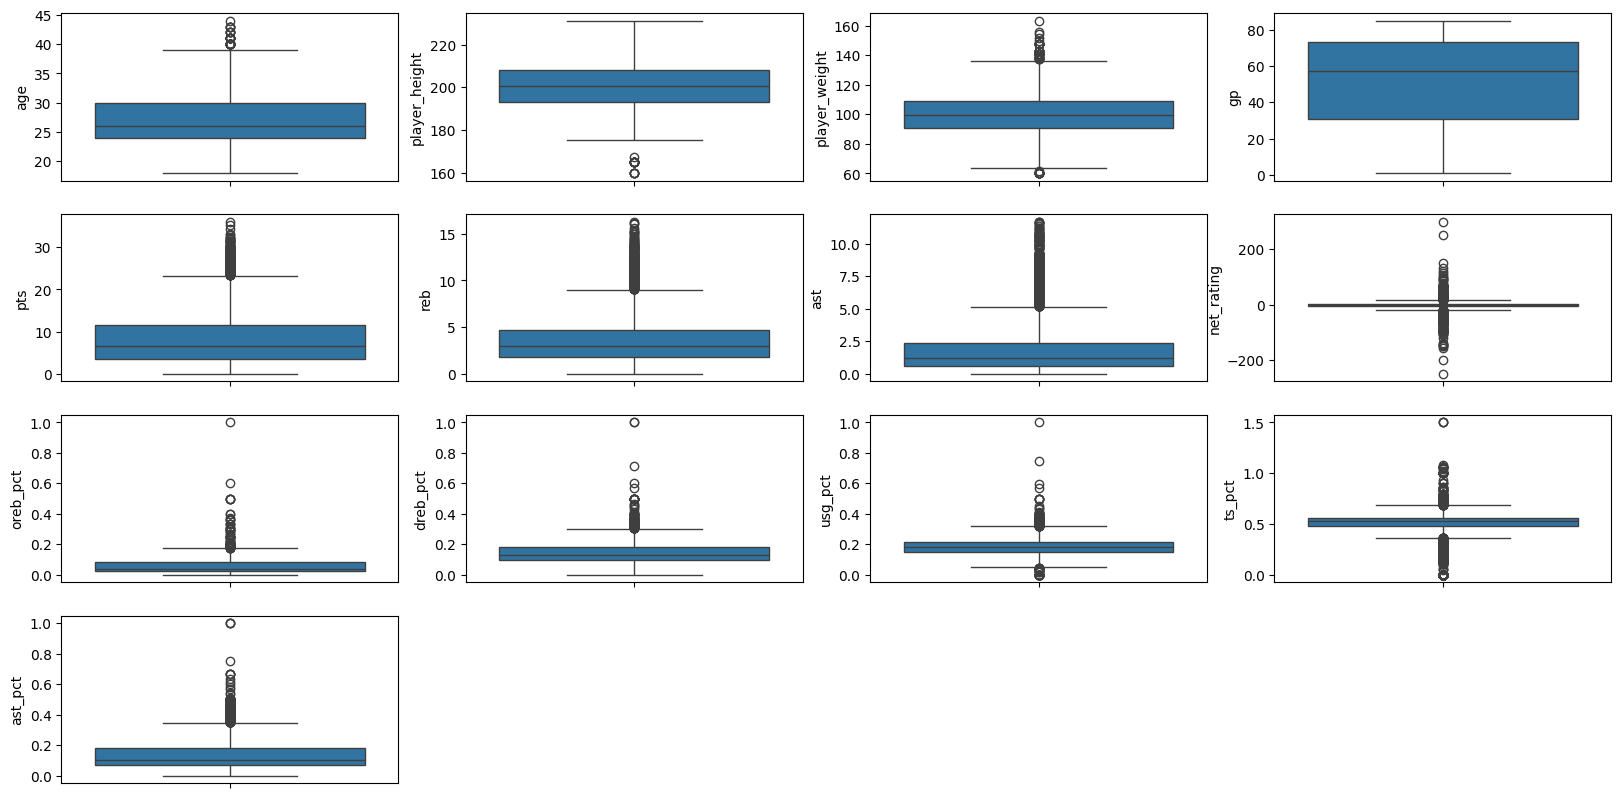

In [12]:
# Let's detect and remove the outliers:-
# Detect the outliers:-
# We will use boxplots for each numerical column to detect the outliers.

plt.figure(figsize=(20, 10))

i = 1

for col in num_cols:
    plt.subplot(4, 4, i)
    sns.boxplot(df_copy[col])
    i = i + 1
    
plt.show()



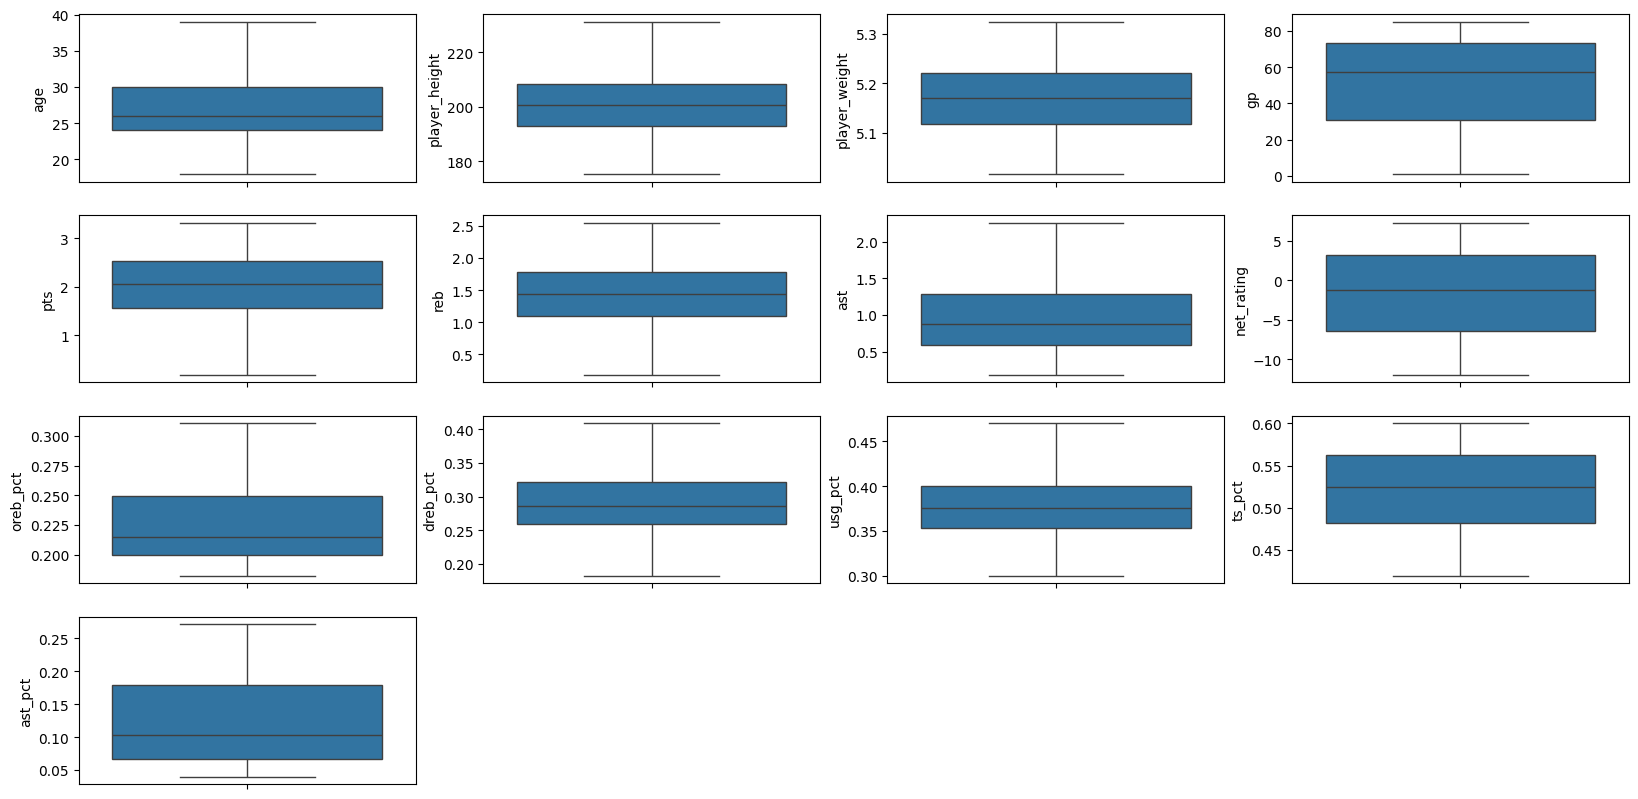

In [13]:
# Clearly, there are outliers almost everywhere, but are relatively small in the columns age, player_height, and negligible in the gp column.
# The other columns like player_weight, pts, reb, ast, net_rating, oreb_pct and similar pct's have a significant number of outliers.
# Hence, we will deal with both the types of outliers in a slightly different manner.

# For the age, player_height, and gp columns, we will use median imputation to handle the outliers, as they are relatively less,
# and median imputation will not affect the data distribution significantly.
# For the other columns, we will still use median imputation, but will add percentile capping along with log transformation,
# to handle the significant number of outliers, as removing them would result in a significant loss of data.

# Handling the age, player_height, and gp columns:-
# Median Imputation for fewer outliers, with a threshold of 1.5 times the IQR
for col in ["age", "player_height", "gp"]:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replacing both lower and upper outliers with the median
    median_value = df_copy[col].median()
    df_copy[col] = np.where((df_copy[col] > upper_bound) | (df_copy[col] < lower_bound), 
                       median_value, df_copy[col])

# Handling the player_weight, pts, reb, ast, net_rating, and oreb_pct columns:-
# Median Imputation with Percentile Capping, followed by Log Transformation, for significant outliers
# Specially for the net_rating, ts_pct and ast_pct columns, we will need winsorization with a large limit to handle the wide range of outliers.
for col in ["player_weight", "pts", "reb", "ast", "net_rating", "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]:
    
    if col != "net_rating" and col != "ts_pct" and col != "ast_pct":
        lower_bound = df_copy[col].quantile(0.01)  # 1st percentile
        upper_bound = df_copy[col].quantile(0.99)  # 99th percentile
        
        df_copy[col] = np.clip(df_copy[col], lower_bound, upper_bound)  # Clip outliers
        
        # Log Transformation
        shift_value = 1.2 + abs(np.min(df_copy[col])) # Shift all values by a positive constant to handle zero and negative values
        df_copy[col] = np.log(df_copy[col] + shift_value)
        
    else:
        from scipy.stats.mstats import winsorize
        df_copy[col] = winsorize(df_copy[col], limits=[0.1, 0.1]) # Winsorize the net_rating column with a large limit
        


# Let's check the boxplots again to see if the outliers have been handled:-
plt.figure(figsize=(20, 10))

i = 1
for col in num_cols:
    plt.subplot(4, 4, i)
    sns.boxplot(df_copy[col])
    i = i + 1



In [14]:
# Clearly, the outliers have been handled effectively, and the data distribution has been maintained as well.
# Now Let's standardize the categorical values, like typos, etc if needed.

# Standardize the categorical values:-
# Check the unique values in the categorical columns, and print in sorted order:-

for col in cat_cols:
    print(f"Unique values in {col} are: {sorted(df_copy[col].unique())}")
    print("\n")
    
    

Unique values in player_name are: ['A.C. Green', 'A.J. Bramlett', 'A.J. Guyton', 'A.J. Lawson', 'AJ Green', 'AJ Griffin', 'AJ Hammons', 'AJ Price', 'Aaron Brooks', 'Aaron Gordon', 'Aaron Gray', 'Aaron Harrison', 'Aaron Henry', 'Aaron Holiday', 'Aaron Jackson', 'Aaron McKie', 'Aaron Miles', 'Aaron Nesmith', 'Aaron Wiggins', 'Aaron Williams', 'Abdel Nader', 'Acie Earl', 'Acie Law', 'Adam Harrington', 'Adam Keefe', 'Adam Mokoka', 'Adam Morrison', 'Ade Murkey', 'Admiral Schofield', 'Adonal Foyle', 'Adonis Jordan', 'Adonis Thomas', 'Adreian Payne', 'Adrian Caldwell', 'Adrian Griffin', 'Ahmad Caver', 'Al Harrington', 'Al Horford', 'Al Jefferson', 'Al Thornton', 'Al-Farouq Aminu', 'Alan Anderson', 'Alan Henderson', 'Alan Williams', 'Alando Tucker', 'Alec Burks', 'Alec Peters', 'Aleem Ford', 'Alekesej Pokusevski', 'Aleksandar Djordjevic', 'Aleksandar Radojevic', 'Aleksej Pokusevski', 'Alen Smailagic', 'Alex Abrines', 'Alex Acker', 'Alex Caruso', 'Alex Garcia', 'Alex Kirk', 'Alex Len', 'Alex Po

In [15]:
# Clearly, the columns 'college', 'country' have couple of typos, otherwise the data is clean.
# We will standardize these typos in the next step.

# Standardize the typos in the 'college' and 'country' columns:-
# Standardization dictionaries
college_mapping = {
    "California-Berkeley": "University of California, Berkeley",
    "Miami (FL)": "University of Miami",
    "Miami (Fla.)": "University of Miami",
    "Louisana-Lafayette": "Louisiana-Lafayette",
    "Wisconsin-Green Bay": "University of Wisconsin-Green Bay",
    "Virginia Tech ": "Virginia Tech"  # Removing trailing space
}

country_mapping = {
    "Bosnia": "Bosnia and Herzegovina",
    "Bosnia & Herzegovina": "Bosnia and Herzegovina",
    "Bosnia and Herzegovina": "Bosnia and Herzegovina",
    "Congo": "Democratic Republic of the Congo",
    "Republic of the Congo": "Democratic Republic of the Congo",
    "Democratic Republic of the Congo": "Democratic Republic of the Congo",
    "DRC": "Democratic Republic of the Congo",
    "US Virgin Islands": "United States Virgin Islands",
    "U.S. Virgin Islands": "United States Virgin Islands",
    "Serbia and Montenegro": "Serbia",
    "Sudan (UK)": "Sudan",
    "USA": "United States"
}

# Apply cleaning
df_copy["college"] = df_copy["college"].str.strip().replace(college_mapping)
df_copy["country"] = df_copy["country"].replace(country_mapping)

# Remove empty or whitespace-only college names
df_copy["college"] = df_copy["college"].replace(r"^\s*$", "Unknown", regex=True)

# Check the unique values in the 'college' and 'country' columns after standardization:-
print(f"Unique values in college are: {sorted(df_copy['college'].unique())}")
print("\n")
print(f"Unique values in country are: {sorted(df_copy['country'].unique())}")



Unique values in college are: ['Alabama', 'Alabama A&M', 'Alabama Huntsville', 'Alabama-Birmingham', 'Albany State (GA)', 'American International', 'American University', 'Arizona', 'Arizona St.', 'Arizona State', 'Arkansas', 'Arkansas-Little Rock', 'Auburn', 'Auburn-Montgomery', 'Augsburg', 'Augusta State', 'Augustana (SD)', 'Austin Peay', 'Ball State', 'Barton Community College', 'Baylor', 'Belmont', 'Blinn', 'Boise State', 'Boston College', 'Boston U.', 'Bowling Green', 'Bradley', 'Brigham Young', 'Brigham Young-Hawaii', 'Bucknell', 'Buffalo', 'Butler', 'Butler Community College', 'Cal Poly', 'Cal State-Bakersfield', 'Cal State-Fullerton', 'Cal State-Long Beach', 'Cal State-San Bernardino', 'Cal-Davis', 'Cal-Santa Barbara', 'California', 'California State-Long Beach', 'California-Irvine', 'California-Los Angeles', 'California-Santa Barbara', 'Campbell University', 'Centenary (LA)', 'Central Arkansas', 'Central Connecticut State', 'Central Florida', 'Central Michigan', 'Central Oklah

### Now that the Data Cleaning is complete, Let's dive into the Exploratory Data Analysis part, where we perform:-


**Univariate Analysis (Single-Variable Exploration)**
- Country distribution(Americans vs Non-Americans)
- Number of players over the years
- Summary statistics (mean, median, mode, variance, skewness, etc.).
- Frequency distributions for categorical variables.
- Histograms and box plots to visualize distributions.

**Bivariate Analysis (Two-Variable Exploration)**
- Number of players vs Seasons played
- Change in maximum points per game
- Most effective and impactful players
- Correlation matrix to identify relationships between numerical variables.
- Scatter plots for continuous variable relationships.
- Bar plots, violin plots, and box plots to compare categorical and numerical variables.

**Multivariate Analysis (Multiple Variables Exploration)**
- Best scoring seasons of the NBA
- Pair plots to analyze multiple relationships simultaneously.
- Heatmaps to visualize correlations among multiple variables.
- Grouped comparisons to identify combined effects of multiple features.


The 83.77 % of the total players are from USA
The 16.23 % of the total players are from the rest of the world



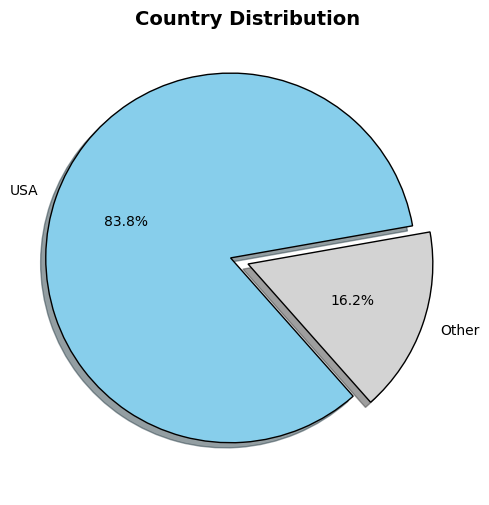

In [16]:
# Let's Start with the Univariate Analysis:-
# Let's analyze the number of players from America and other countries:-

df_unique = df[['player_name', 'draft_year', 'country']].drop_duplicates()
americans = df_unique[df_unique['country']=='USA'].shape[0]
non_americans = df_unique[df_unique['country']!='USA'].shape[0]
americans_pct = americans/df_unique.shape[0]
non_americans_pct = non_americans/df_unique.shape[0]

print("")
print(f'The {100*americans_pct:.2f} % of the total players are from USA')
print(f'The {100*non_americans_pct:.2f} % of the total players are from the rest of the world')

print("")

labels = ['USA', 'Other']
sizes = [americans, non_americans]  
colors = ['skyblue', 'lightgray']  
explode = (0.1, 0) 

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, 
        startangle=10, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.ylabel('')  
plt.title('Country Distribution', fontsize=14, fontweight='bold')  
plt.show()

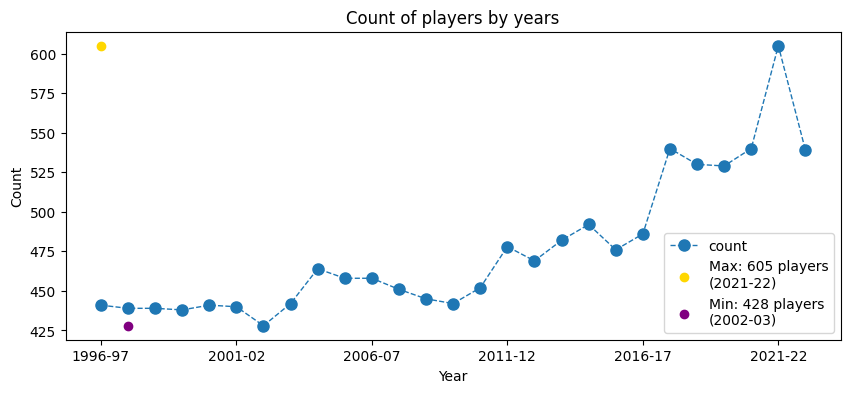

In [17]:
# Let's analyze the variation of number of players over the years:-

plt.figure(figsize=(10, 4))
df['season'].value_counts().sort_index().plot(marker='o', linestyle='--', markersize=8, linewidth=1)

max_year = df['season'].value_counts().idxmax()
min_year = df['season'].value_counts().idxmin()
max_count = df['season'].value_counts().max()
min_count = df['season'].value_counts().min()

plt.scatter(max_year, max_count, color='gold', label=f'Max: {max_count} players\n({max_year})')
plt.scatter(min_year, min_count, color='purple', label=f'Min: {min_count} players\n({min_year})')

plt.title('Count of players by years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

In [18]:
# Univariate Analysis of Numerical Columns:-
df_copy.describe()

age  player_height  player_weight            gp           pts  \
count  12844.000000   12844.000000   12844.000000  12844.000000  12844.000000   
mean      26.991514     200.609480       5.169644     51.154158      2.031053   
std        4.259474       9.000697       0.069016     25.084904      0.673813   
min       18.000000     175.260000       5.016520      1.000000      0.182322   
25%       24.000000     193.040000       5.116562     31.000000      1.568616   
50%       26.000000     200.660000       5.169534     57.000000      2.066863   
75%       30.000000     208.280000       5.219841     73.000000      2.541602   
max       39.000000     231.140000       5.324552     85.000000      3.325036   

                reb           ast    net_rating      oreb_pct      dreb_pct  \
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000   
mean       1.434401      0.968503     -1.700335      0.225412      0.291671   
std        0.498065      0.497727      6.095660      0.031453      0.043958   
min        0.182322      0.182322    -12.000000      0.182322      0.182322   
25%        1.098612      0.587787     -6.400000      0.199670      0.259283   
50%        1.435085      0.875469     -1.300000      0.215111      0.285555   
75%        1.774952      1.280934      3.200000      0.249201      0.321359   
max        2.549445      2.261763      7.300000      0.310422      0.408793   

            usg_pct        ts_pct       ast_pct  
count  12844.000000  12844.000000  12844.000000  
mean       0.377527      0.519486      0.127057  
std        0.034514      0.055792      0.075496  
min        0.300105      0.419000      0.040000  
25%        0.353470      0.482000      0.066000  
50%        0.375693      0.525000      0.103000  
75%        0.400118      0.563000      0.179000  
max        0.470004      0.600000      0.271000

In [19]:
print("The numerical columns are: ", num_cols)
print("The categorical columns are: ", cat_cols)


The numerical columns are:  Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')
The categorical columns are:  Index(['player_name', 'team_abbreviation', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'season'],
      dtype='object')


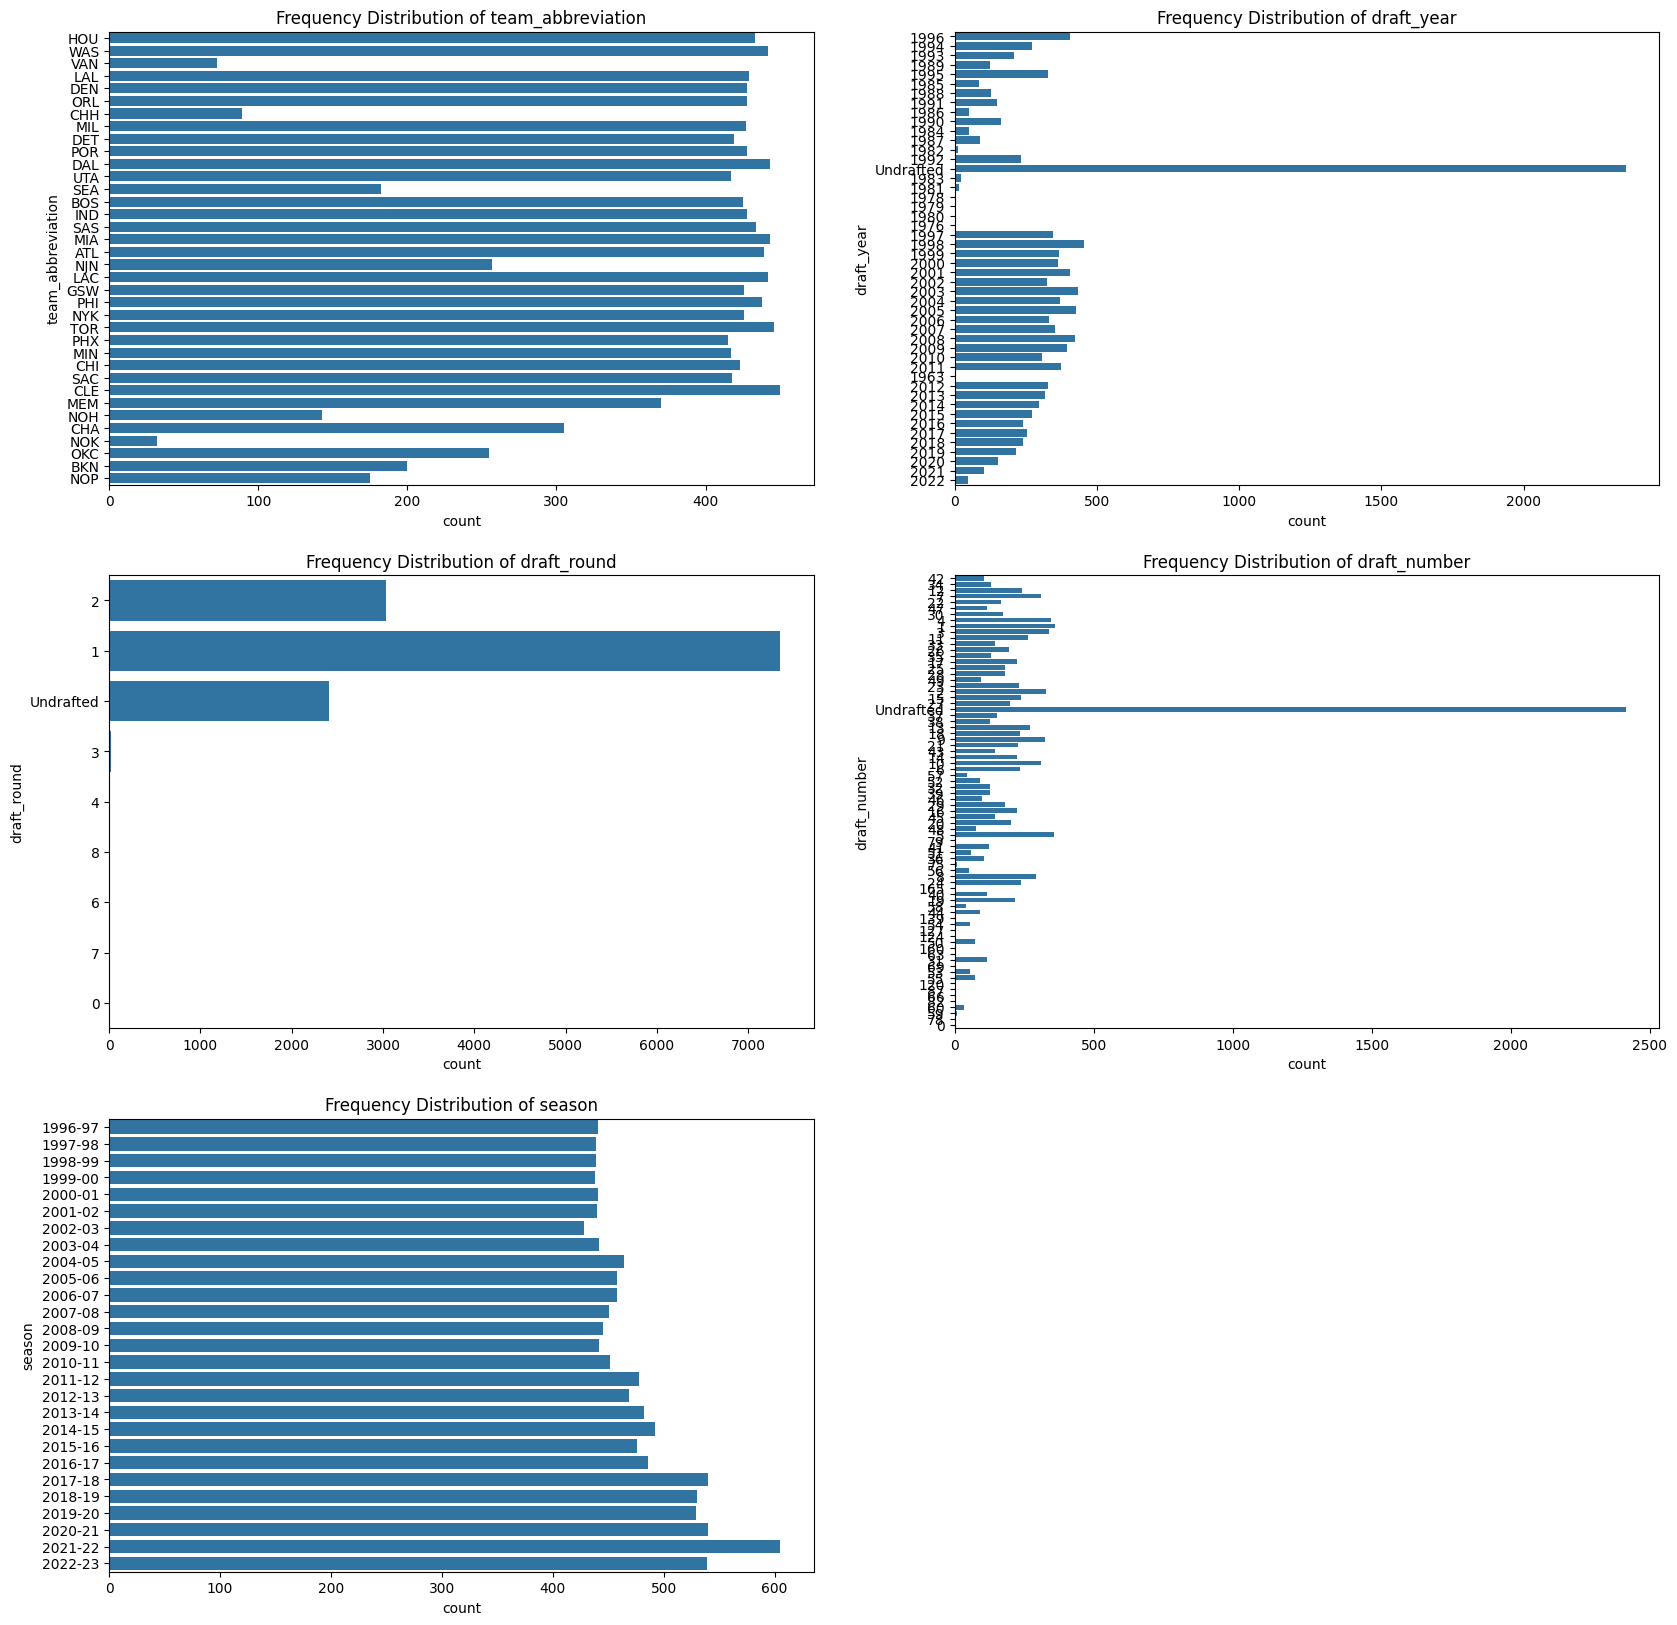

In [20]:
# Frequency distribution of the categorical columns:-

plt.figure(figsize=(20, 20))

chosen_cols = ['team_abbreviation', 'draft_year', 'draft_round', 'draft_number', 'season'] # As 'player_name', 'country' and 'college' have a large number of unique values
i = 1
for col in chosen_cols:
    plt.subplot(3, 2, i)
    sns.countplot(df_copy[col])
    plt.title(f"Frequency Distribution of {col}")
    i += 1
    
plt.show()

# Clearly, the frequency distribution of the categorical columns is quite balanced, except that "Undrafted" players are more in some cases.
# The frequency distribution is pretty much uniform in the 'team_abbreviation' column, and the 'season' column has a balanced distribution as well.
# The 'season' column seems to slightly increase over the years, which is expected.
# While the 'draft_year', 'draft_round', and 'draft_number' columns have a skewed distribution, as expected.

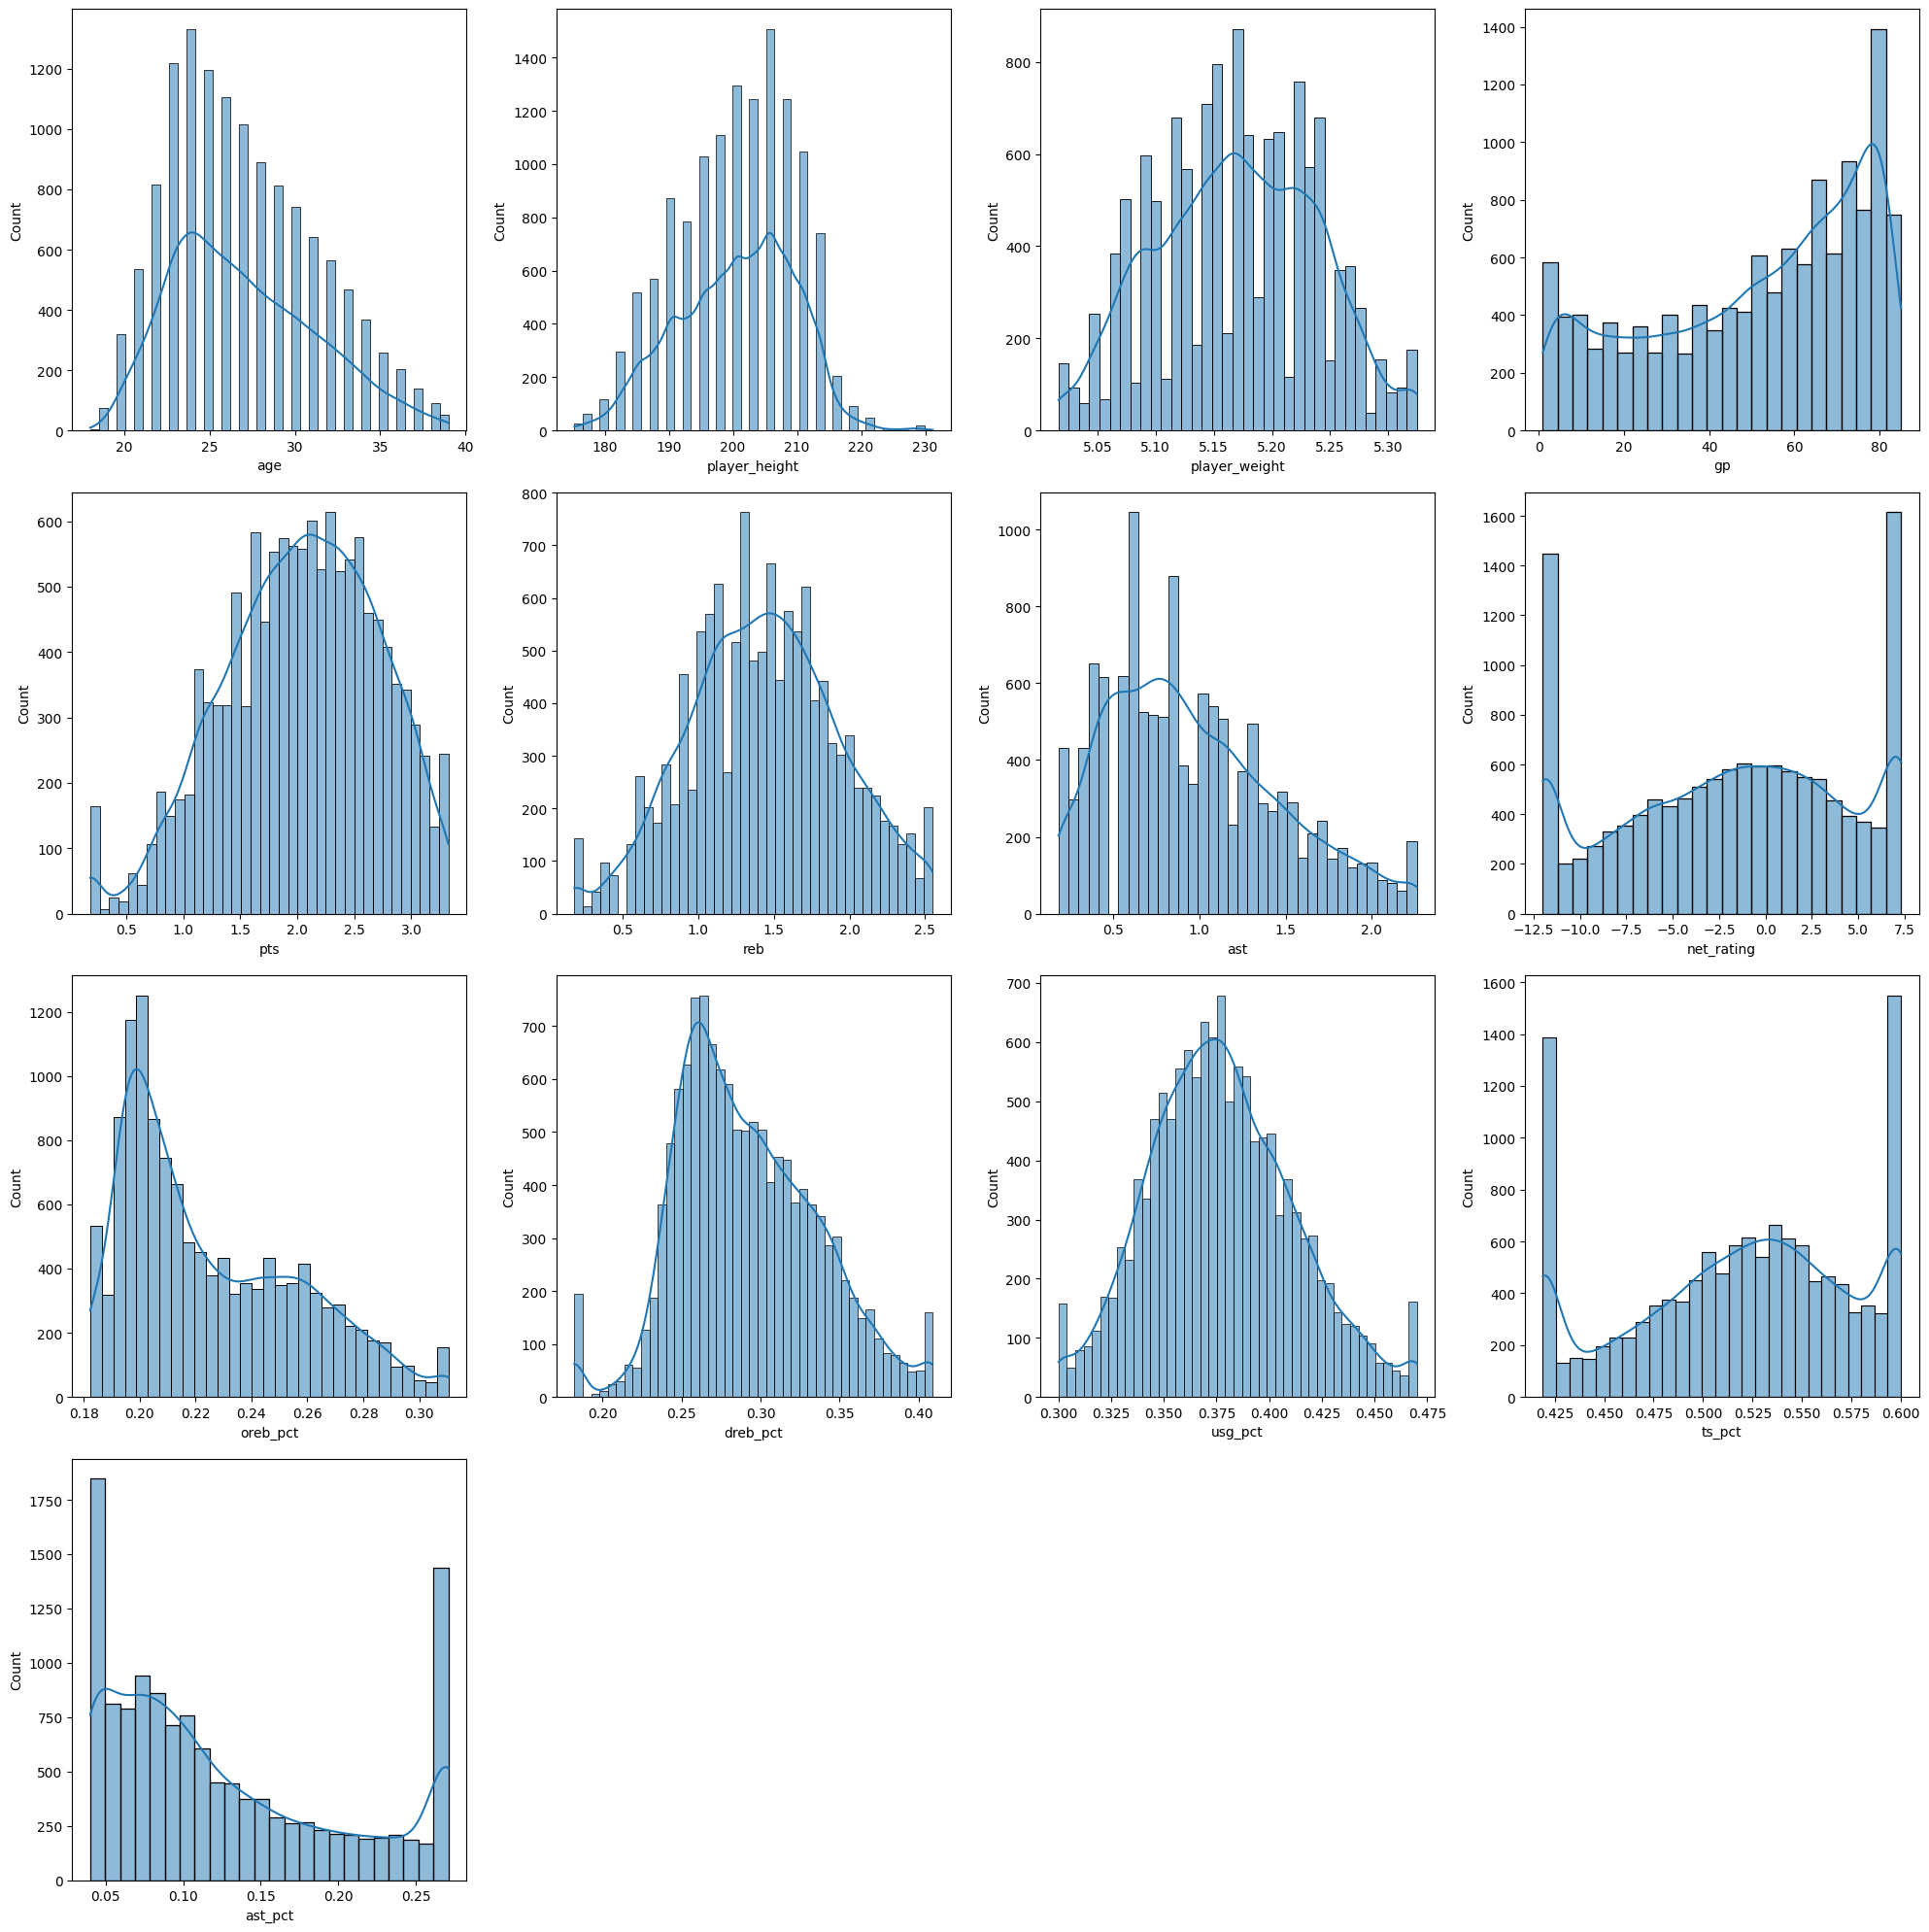

In [21]:
# Let's plot the histogram of the numerical columns, as boxplots have already been plotted:-
plt.figure(figsize=(20, 20))

i = 1
for col in num_cols:
    plt.subplot(4, 4, i)
    sns.histplot(df_copy[col], kde=True)
    plt.xlabel(col)
    i += 1

plt.tight_layout()
plt.show()

# Clearly, the numerical columns are not perfectly normal, and have a slightly skewed distribution.
# The column net_rating is almost normally distributed, except for the ends, due to the outliers.

# Bivariate Analysis:-
- Number of players vs Seasons played
- Change in maximum points per game
- Most effective and impactful players
- Correlation matrix to identify relationships between numerical variables.
- Scatter plots for continuous variable relationships.
- Bar plots, violin plots, and box plots to compare categorical and numerical variables.

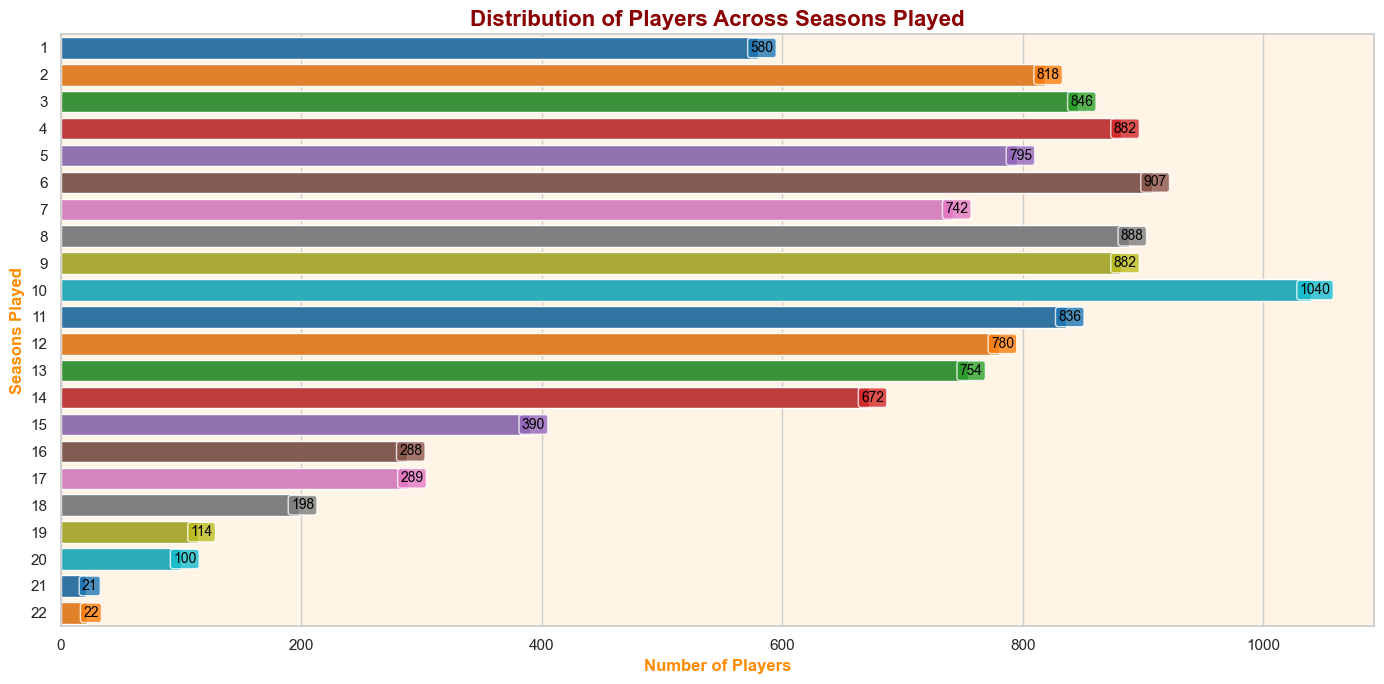

In [22]:
# Let's move on to the Bivariate Analysis:-

# Let's analyze the distribution of players across different seasons:-


sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

df['SeasonsPlayed'] = df.groupby('player_name')['season'].transform('nunique')

colors = sns.color_palette("tab10", n_colors=len(df['SeasonsPlayed'].value_counts()))
sns.countplot(data=df, y=df['SeasonsPlayed'], palette=colors)
for index, value in enumerate(df['SeasonsPlayed'].value_counts().sort_index()):
    plt.text(value + 3, index, str(value), ha='center', va='center', 
             fontsize=10, color='black', bbox=dict(boxstyle="round,pad=0.2", fc=colors[index], alpha=0.8))

plt.title('Distribution of Players Across Seasons Played', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Number of Players', fontsize=12, fontweight='bold', color='darkorange')
plt.ylabel('Seasons Played', fontsize=12, fontweight='bold', color='darkorange')
plt.gca().set_facecolor('#fff4e6')

plt.tight_layout()
plt.show()



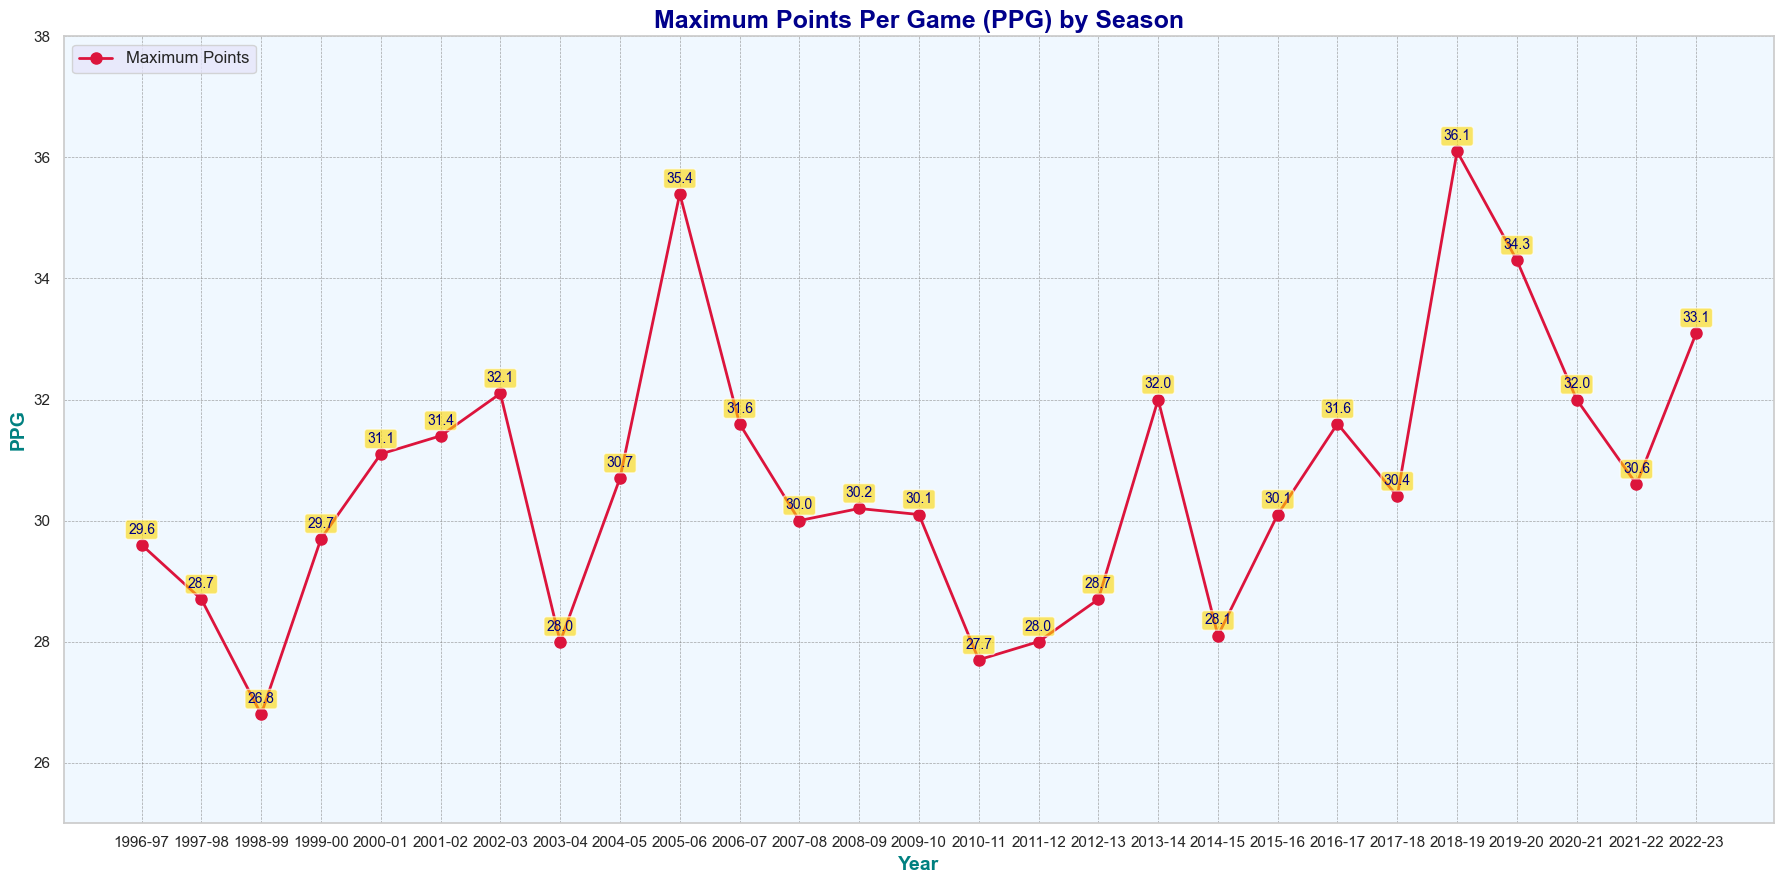

In [23]:
# Analyzing the Maximum Points Per Game vs the Season:-


sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 9))


plt.plot(df.groupby('season')['pts'].max(), 
         marker='o', 
         label='Maximum Points', 
         linestyle='-', 
         markersize=8, 
         linewidth=2, 
         color='crimson')


for season, points in df.groupby('season')['pts'].max().items():
    plt.annotate(f'{points:.1f}', (season, points),
                 textcoords="offset points", xytext=(0, 8), ha='center',
                 fontsize=10, color='navy', 
                 bbox=dict(boxstyle="round,pad=0.2", fc="gold", alpha=0.6))


plt.title(' Maximum Points Per Game (PPG) by Season ', fontsize=18, fontweight='bold', color='darkblue')


plt.xlabel('Year', fontsize=14, fontweight='bold', color='teal')
plt.ylabel('PPG', fontsize=14, fontweight='bold', color='teal')
plt.ylim(25, 38)


plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7, color='grey')

plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, facecolor='lavender')

plt.gca().set_facecolor('#f0f8ff')

plt.tight_layout()
plt.show()


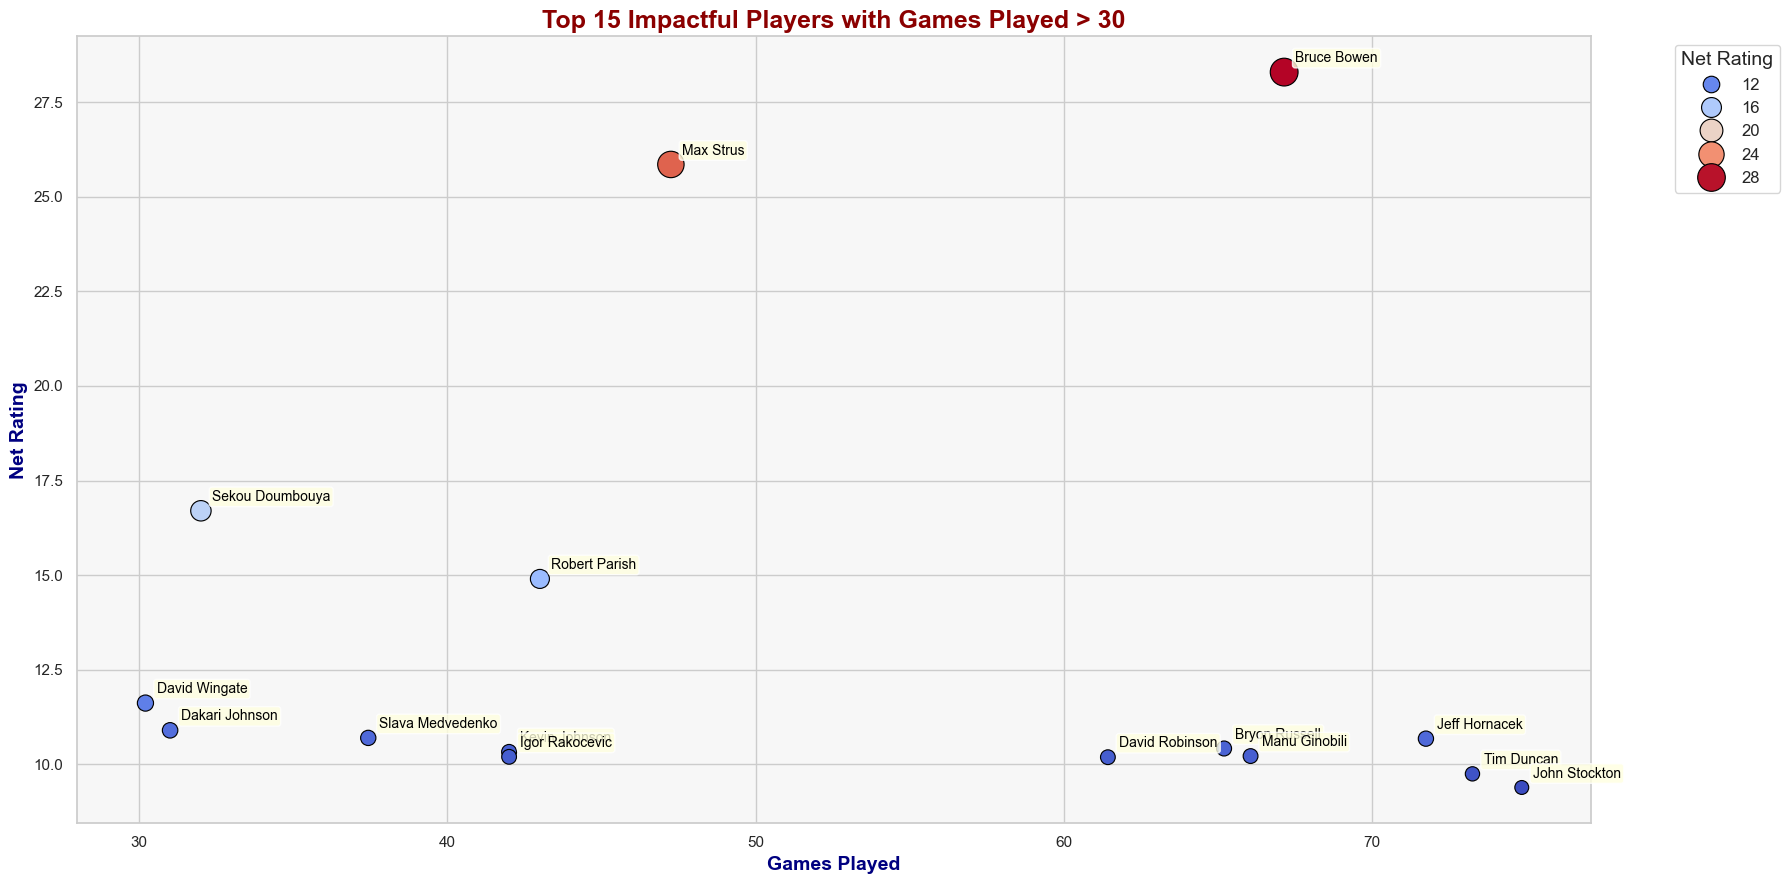

net_rating all_star    pts    reb   ast
player_name                                              
Bruce Bowen            28.29       No   5.38   2.50  1.12
Max Strus              25.85       No   7.68   1.95  1.02
Sekou Doumbouya        16.70       No   6.17   2.90  0.43
Robert Parish          14.90       No   3.70   2.10  0.50
David Wingate          11.62       No   2.64   0.64  0.90
Dakari Johnson         10.90       No   1.80   1.10  0.30
Slava Medvedenko       10.70       No   4.26   1.97  0.41
Jeff Hornacek          10.68      Yes  13.32   3.00  3.85
Bryon Russell          10.42       No   8.08   3.58  1.43
Kevin Johnson          10.33       No  12.10   3.20  6.07
Manu Ginobili          10.22      Yes  13.15   3.48  3.78
Igor Rakocevic         10.20       No   1.90   0.40  0.80
David Robinson         10.19      Yes  15.43   9.07  1.66
Tim Duncan              9.75      Yes  18.89  10.77  3.01
John Stockton           9.39       No  12.19   2.77  8.53

In [24]:
# Analyzing the most Impactful Players in the NBA:-

df1 = df.groupby('player_name', as_index=False).mean(numeric_only=True).round(2)
scoring = round(df1['pts'].quantile(0.9),2)
rebounding = round(df1['reb'].quantile(0.9),2)
passing = round(df1['ast'].quantile(0.9),2)
df1['all_star'] = np.where(((df1['pts'] > scoring) & (df1['reb'] > rebounding)) | ((df1['pts'] > scoring) & (df1['ast'] > passing)), 'Yes', 'No')
impact_players = df1[df1['gp'] > 30].sort_values(by='net_rating', ascending=False).head(15)


sns.set(style="whitegrid")

plt.figure(figsize=(18, 9))


scatter_plot = sns.scatterplot(
    x='gp', 
    y='net_rating', 
    data=impact_players, 
    size='net_rating', 
    sizes=(100, 400), 
    hue='net_rating', 
    palette='coolwarm', 
    edgecolor='black', 
    legend="brief"
)


plt.xlabel('Games Played', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('Net Rating', fontsize=14, fontweight='bold', color='navy')
plt.title(' Top 15 Impactful Players with Games Played > 30 ', fontsize=18, fontweight='bold', color='darkred')

# Adding annotations for each player
for i, player in enumerate(impact_players['player_name']):
    plt.annotate(
        player, 
        (impact_players['gp'].iloc[i], impact_players['net_rating'].iloc[i]),
        textcoords="offset points", 
        xytext=(8, 5), 
        ha='left', 
        va='bottom', 
        fontsize=10, 
        color='black', 
        bbox=dict(boxstyle="round,pad=0.2", fc="lightyellow", alpha=0.8)
    )

# Customize the legend
plt.legend(
    title='Net Rating', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    fontsize=12, 
    title_fontsize=14, 
    fancybox=True
)

# Set a subtle light background
plt.gca().set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

impact_players[['player_name','net_rating','all_star', 'pts','reb','ast']].sort_values(by='net_rating', ascending=False).set_index('player_name')

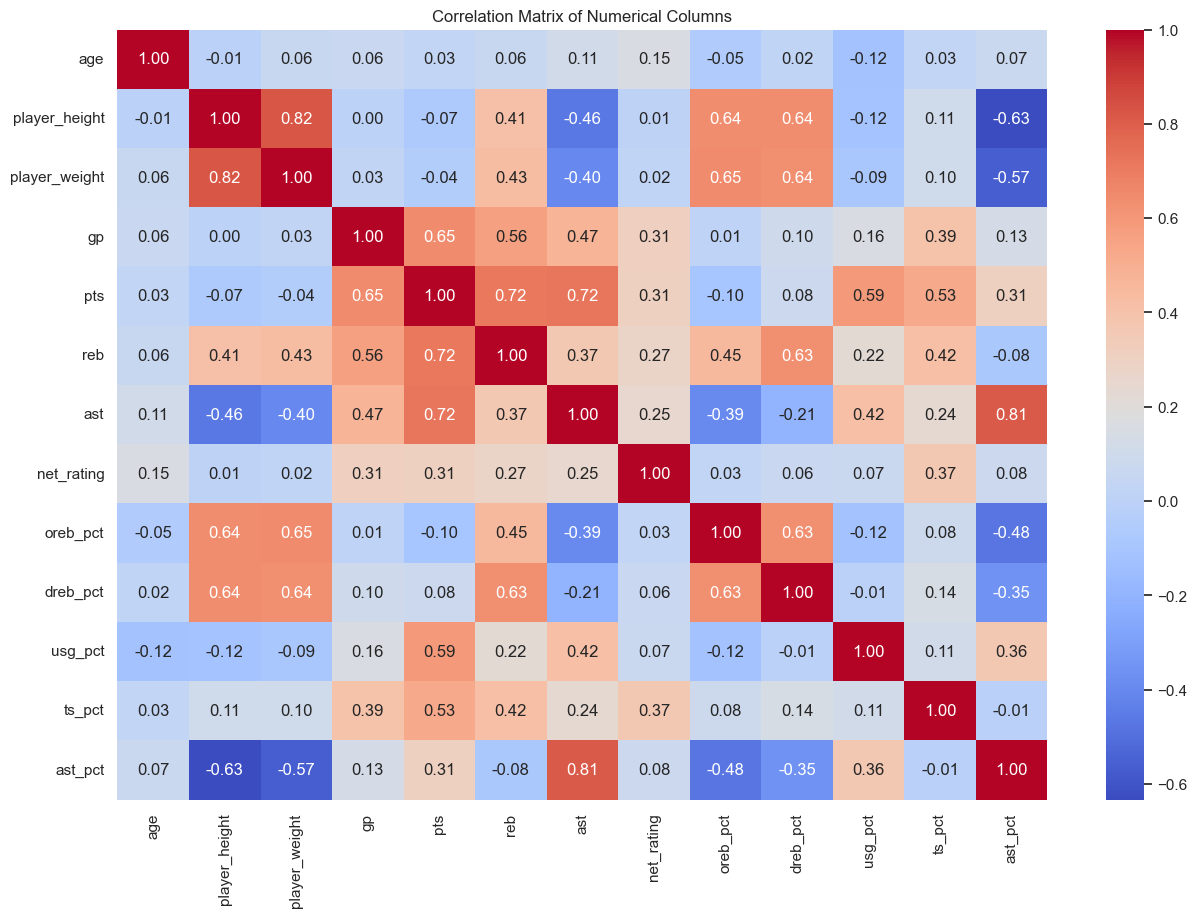

In [25]:
# Bivariate Analysis of Numerical Columns:-
# Correlation Matrix of the numerical columns:-
plt.figure(figsize=(15, 10))

# Let's use a heatmap to visualize the correlation matrix better:-
sns.heatmap(df_copy[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

# We can observe some interesting correlations between the numerical columns, like:
# - The number of games played (gp) is highly positively correlated with the number of points scored (pts), rebounds (reb), and assists (ast) as expected.
# - The number of points scored (pts) is also highly positively correlated with rebounds (reb) and assists (ast).
# - The number of rebounds (reb) is highly positively correlated with assists (ast).
# - The player_height is highly positively correlated with player_weight, which is quite intuitive.
# - the player height is positively correlated with the oreb_pct(Offensive Rebound Percentage) and defensive rebound percentage(dreb_pct), which is quite intuitive.
# - The player weight is negatively correlated with ast(assists), ast_pct(assist percentage), which is quite intuitive.


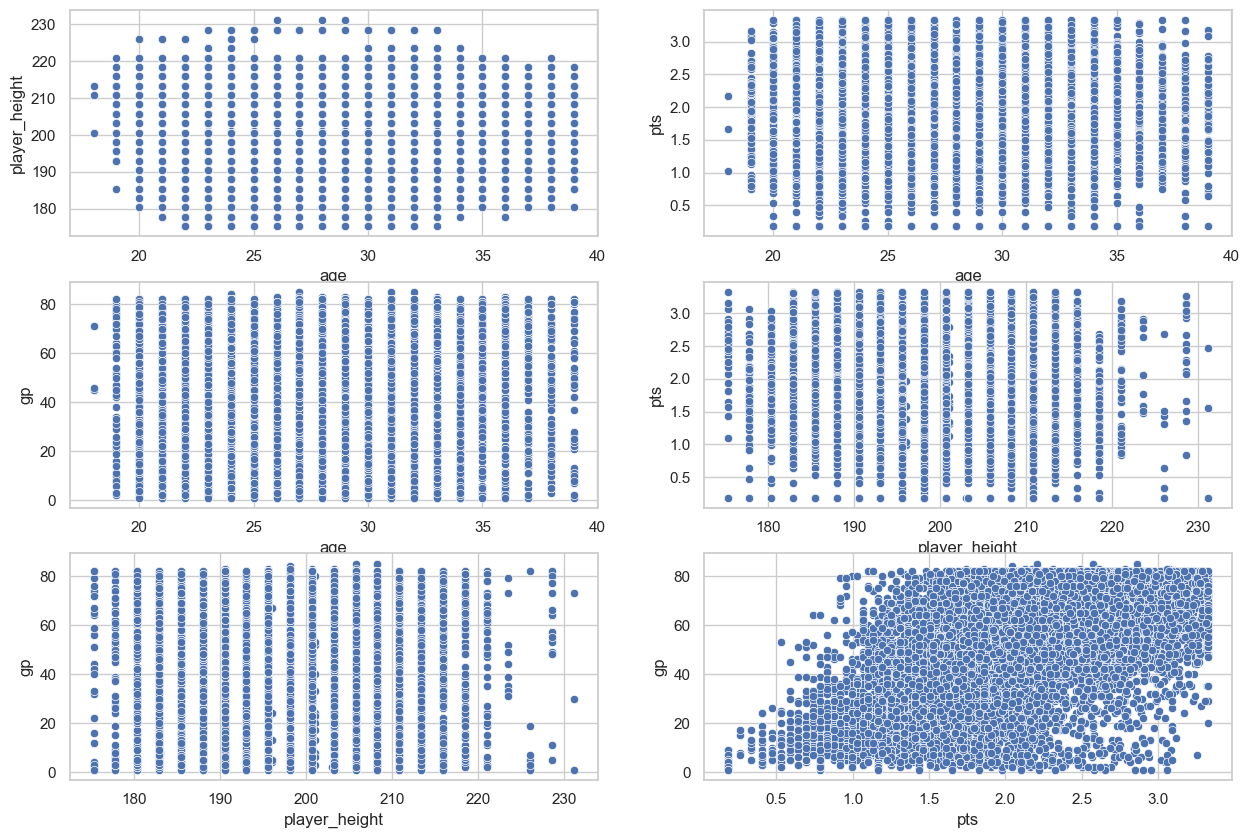

In [26]:
# Scatterplot of the numerical columns:-
# Let's choose a few numerical columns for the pairplot, as all the columns will make the plot too crowded.
# We will choose the columns 'age', 'player_height', 'pts', 'ast', 'oreb_pct' for the pairplot.
chosen_cols = ['age', 'player_height', 'pts', 'gp']

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.scatterplot(x='age', y='player_height', data=df_copy)
plt.subplot(3, 2, 2)
sns.scatterplot(x='age', y='pts', data=df_copy)
plt.subplot(3, 2, 3)
sns.scatterplot(x='age', y='gp', data=df_copy)
plt.subplot(3, 2, 4)
sns.scatterplot(x='player_height', y='pts', data=df_copy)
plt.subplot(3, 2, 5)
sns.scatterplot(x='player_height', y='gp', data=df_copy)
plt.subplot(3, 2, 6)
sns.scatterplot(x='pts', y='gp', data=df_copy)
plt.show()

# Clearly, the plots suggest that the numerical columns are not perfectly linearly correlated


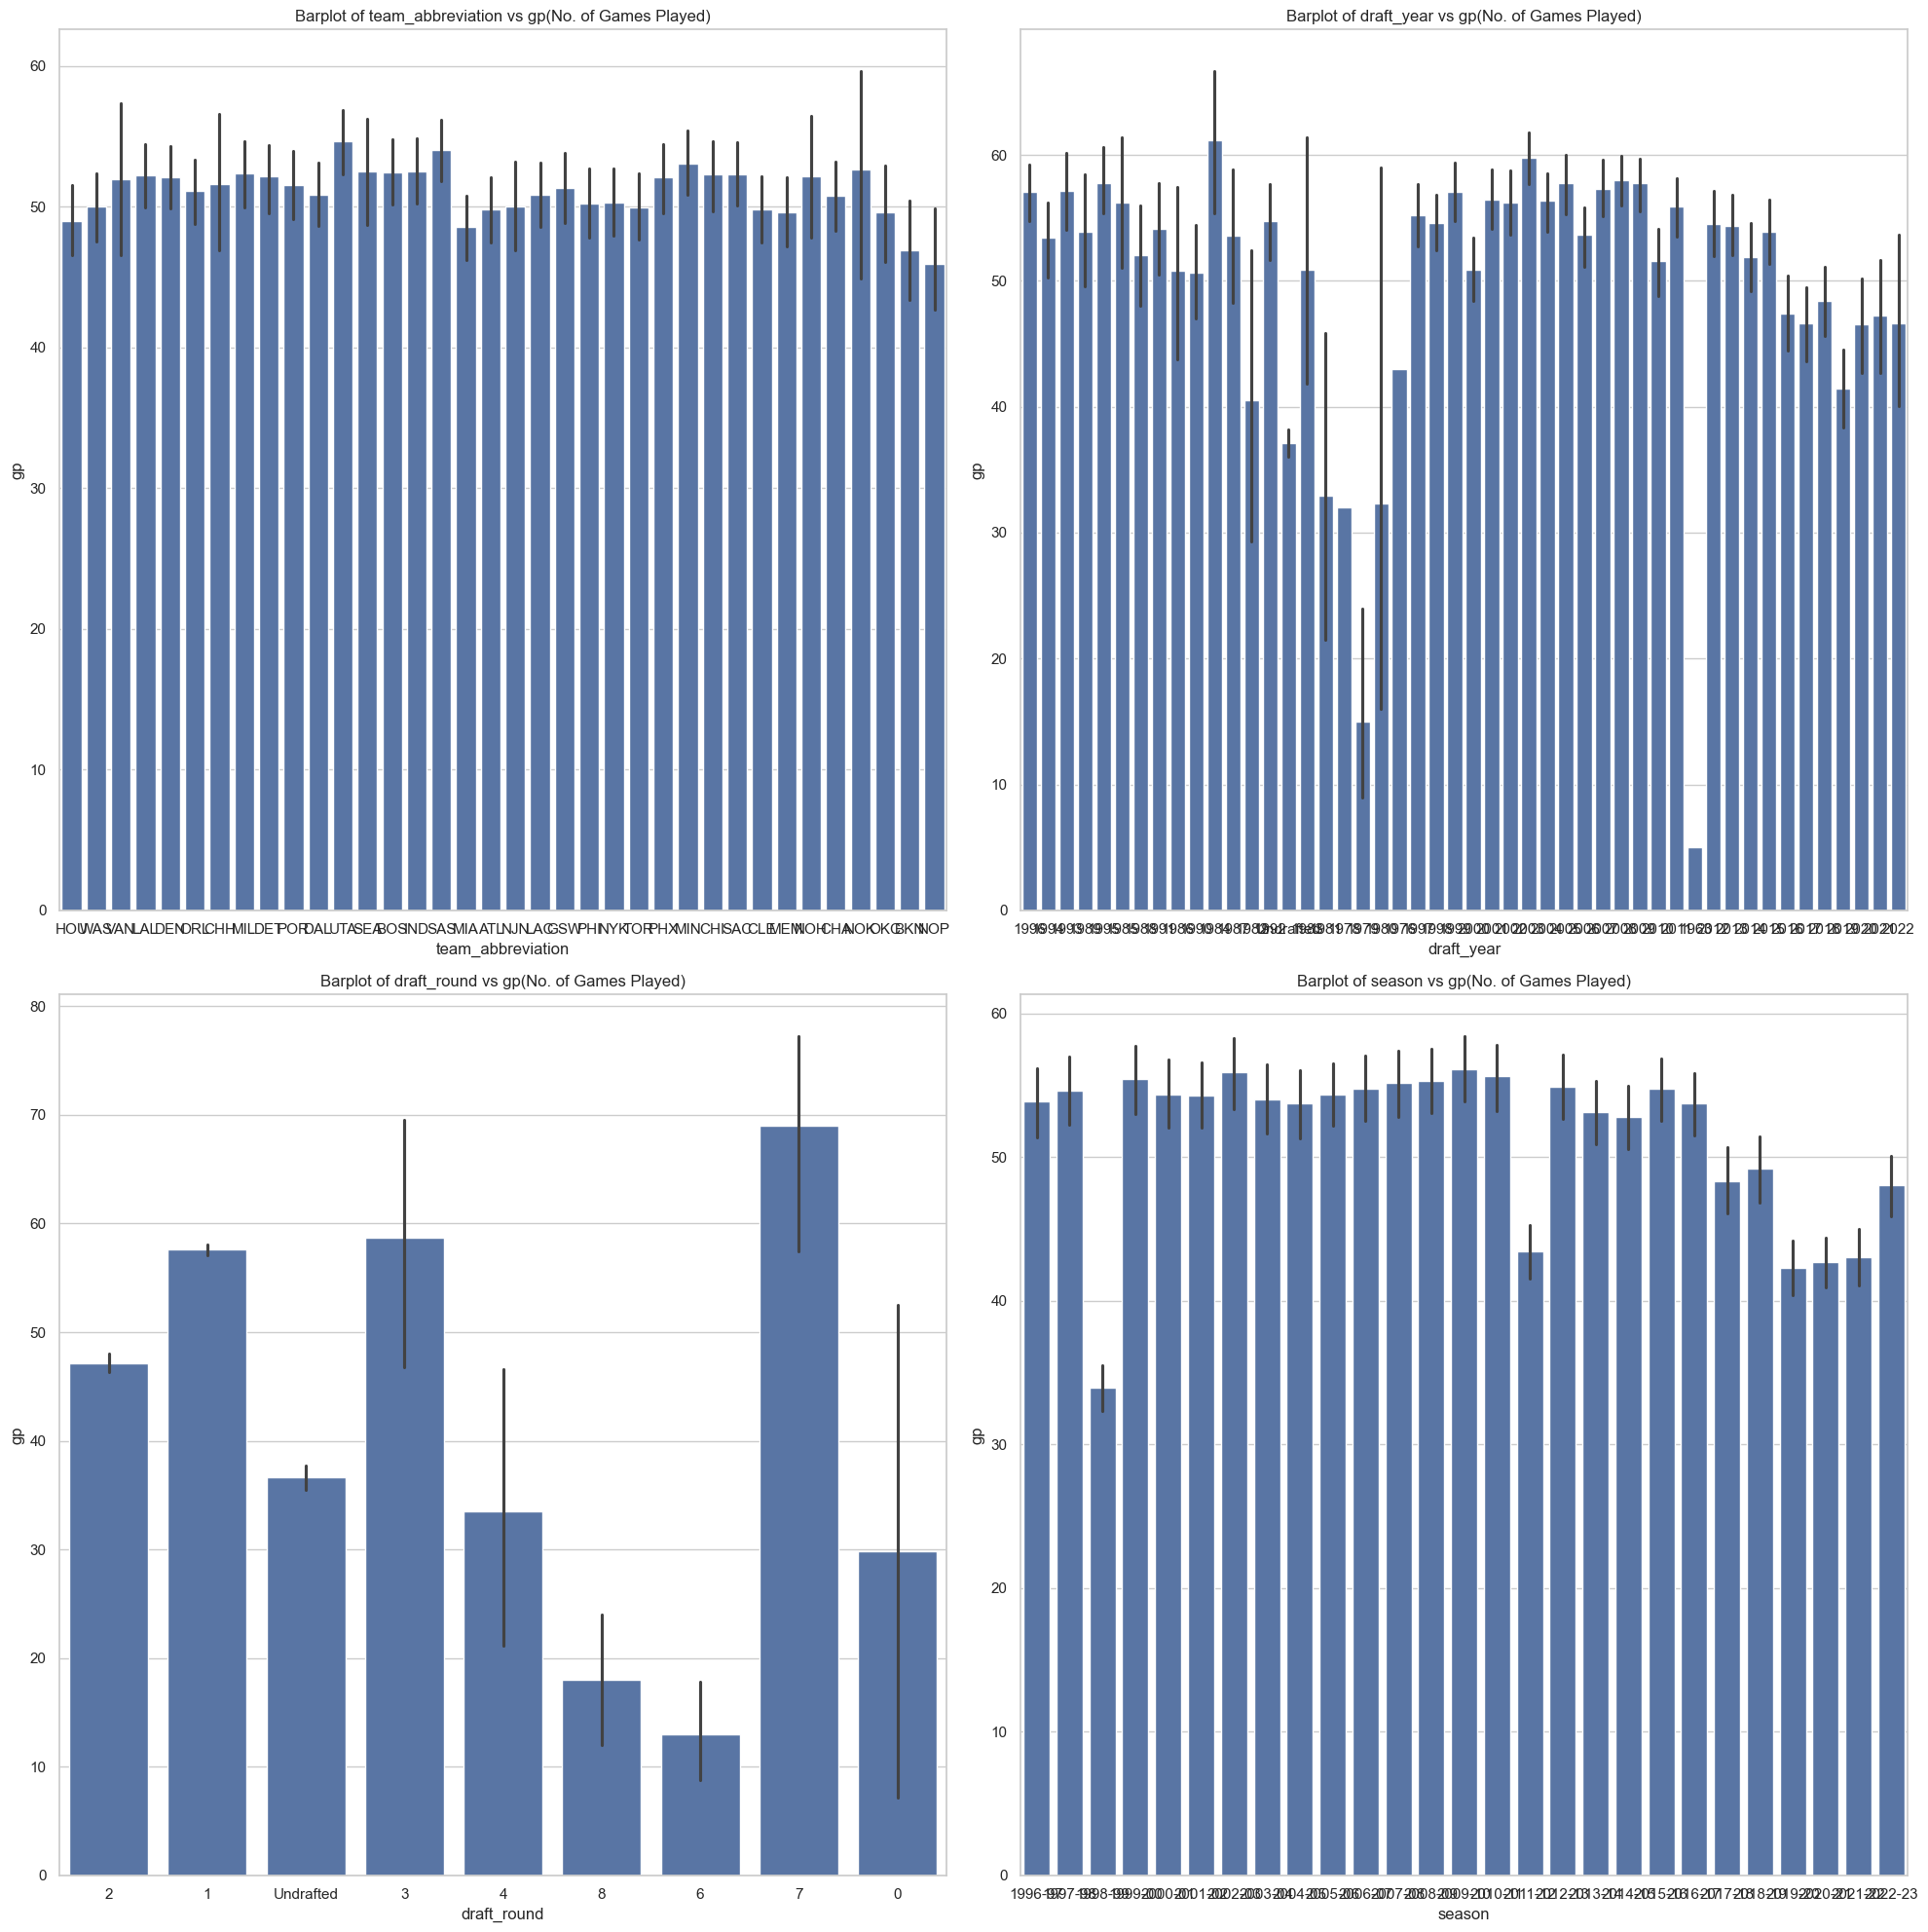

In [27]:
# Barplot of the categorical columns:-
plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y='gp', data=df_copy)
    plt.title(f"Barplot of {col} vs gp(No. of Games Played)")
    i += 1

plt.tight_layout()
plt.show()

# The barplots are pretty much uniform, except for the 'draft_round' column, which is a bit uneven.
# The 'team_abbreviation' column has a balanced distribution, and the 'season' column
# has a slightly decreasing trend, quite contrary to intuition.

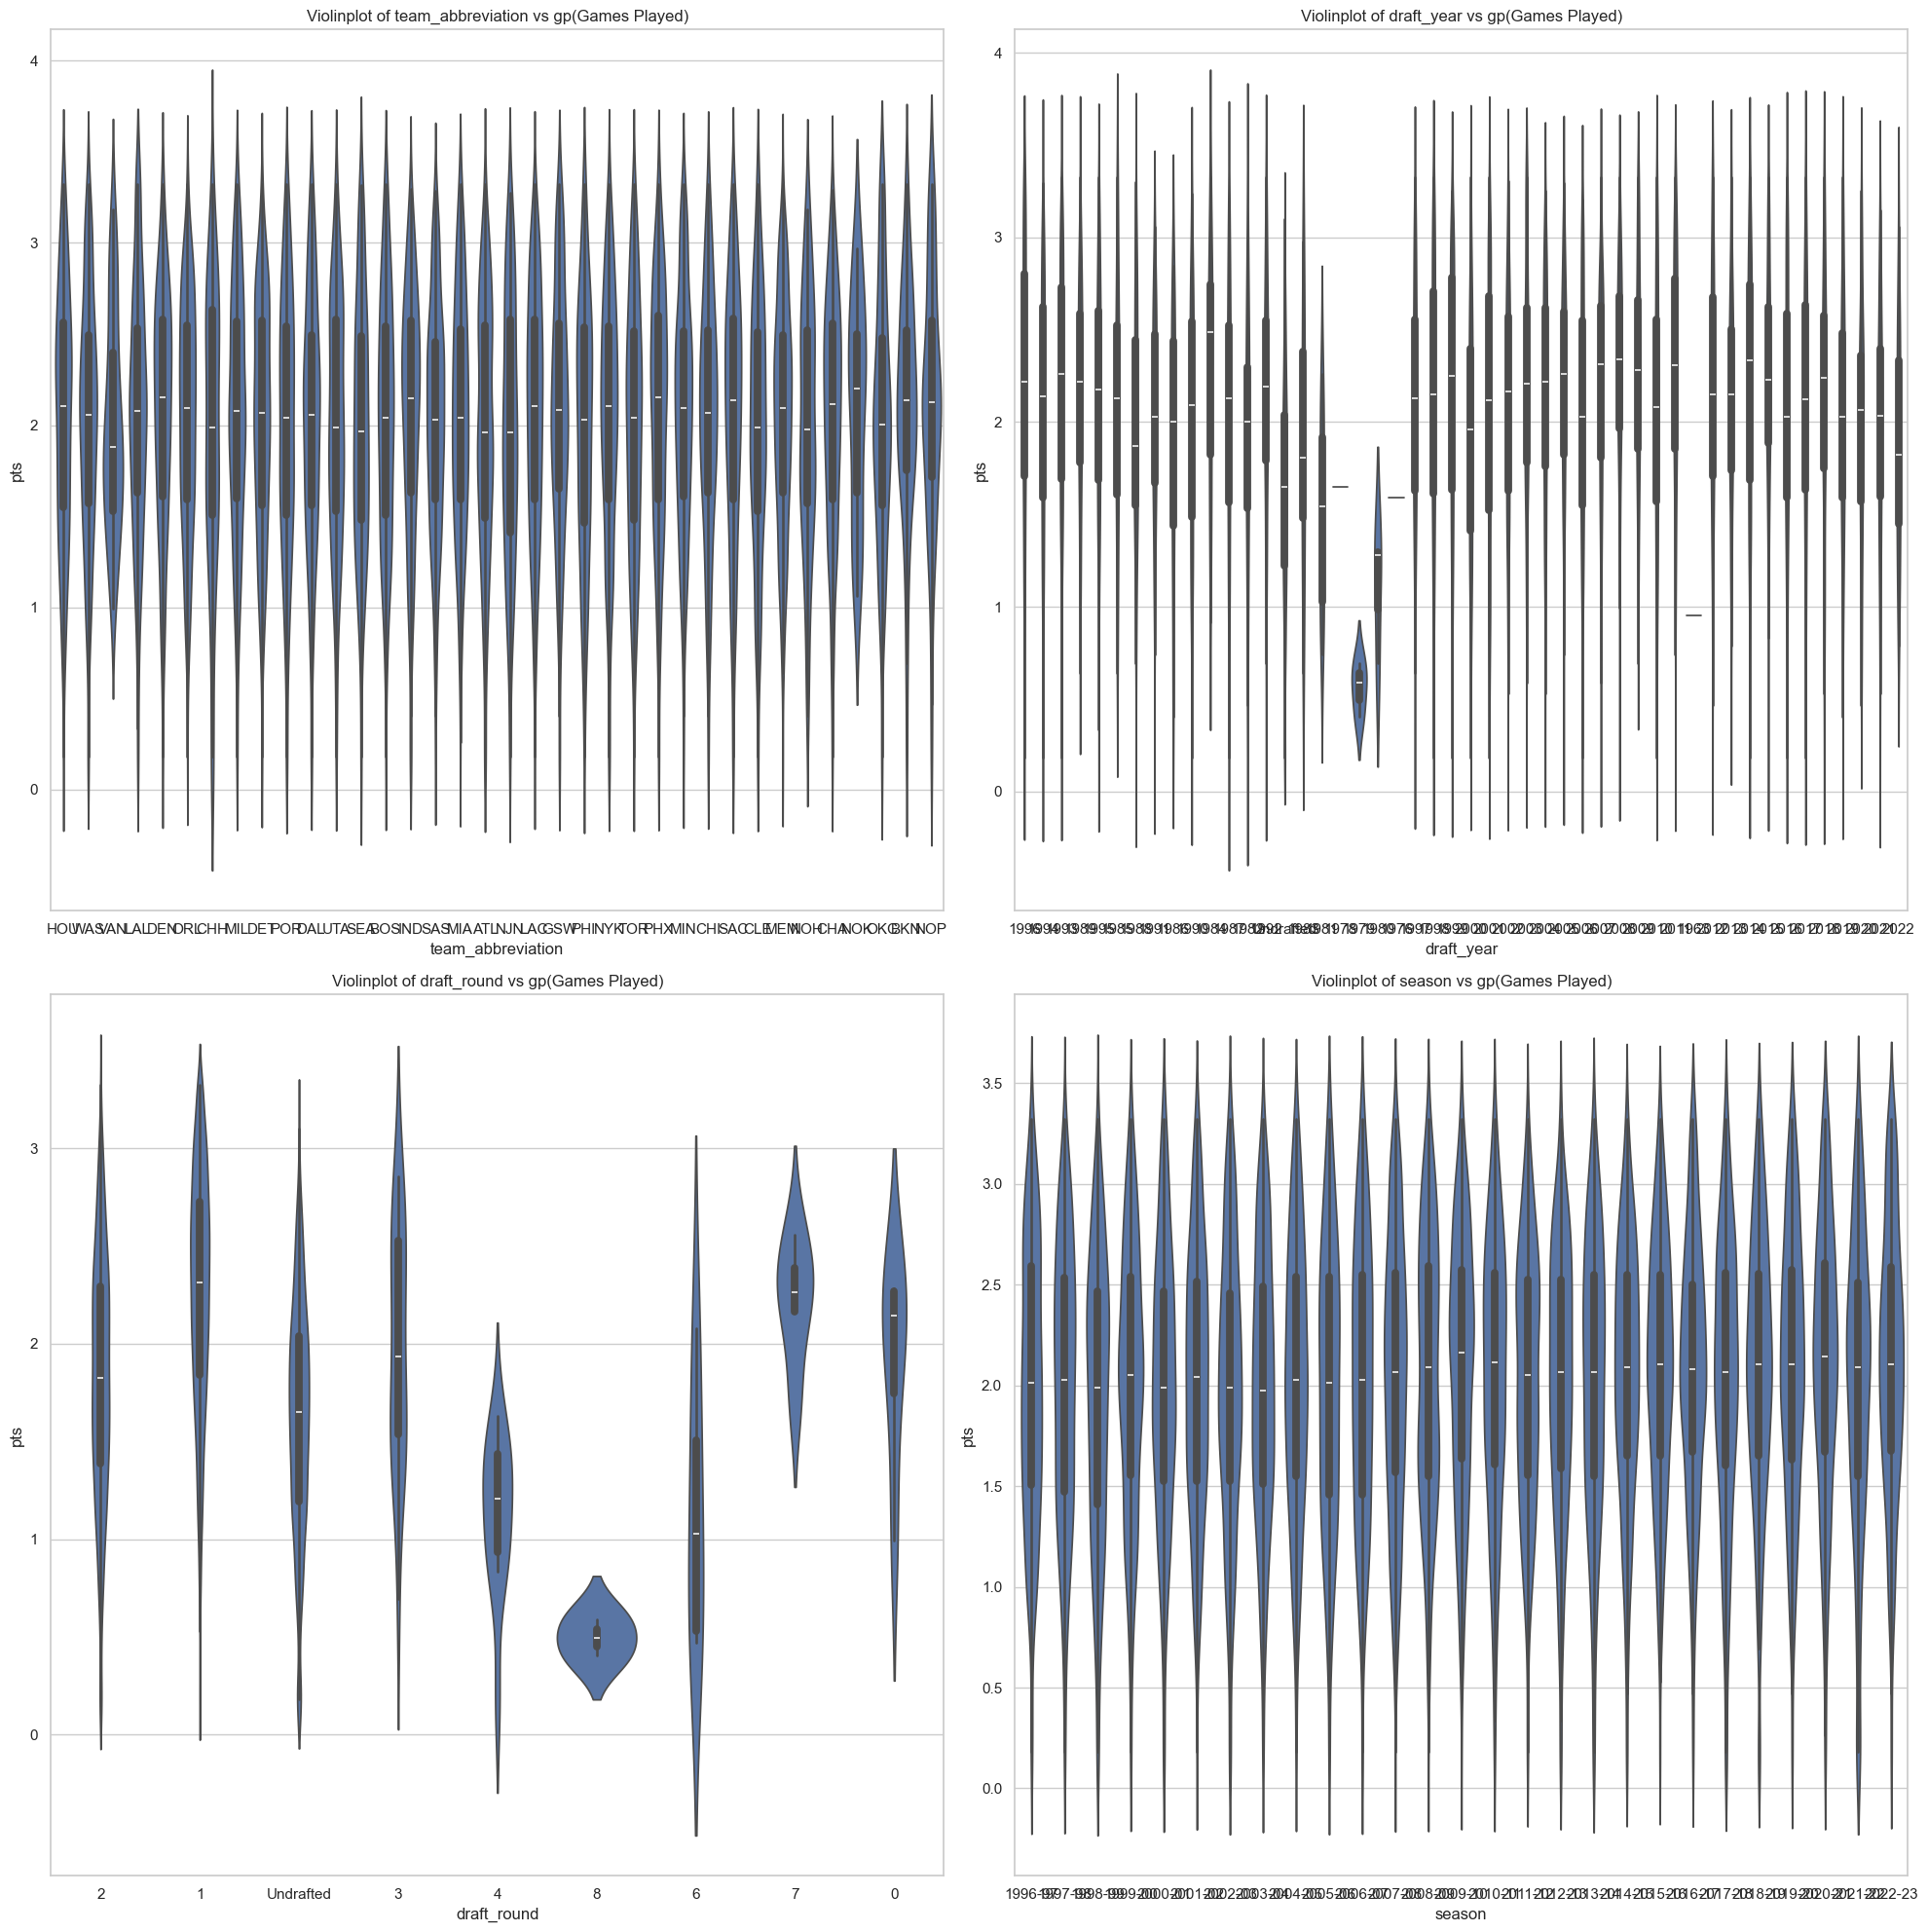

In [28]:
# Violinplot of the categorical columns:-

plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.violinplot(x=col, y='pts', data=df_copy)
    plt.title(f"Violinplot of {col} vs gp(Games Played)")
    i += 1
    
plt.tight_layout()
plt.show()

# Clearly, the barplots and violinplots suggest that the categorical columns are not perfectly linearly correlated with the numerical columns.
# The columns team_abbreviation, draft_year have a wide range of values, and hence, the distribution is not very clear.
# The columns draft_round and season have a relatively smaller range of values, and hence, the distribution is clearer.
# But overall, the distribution is 

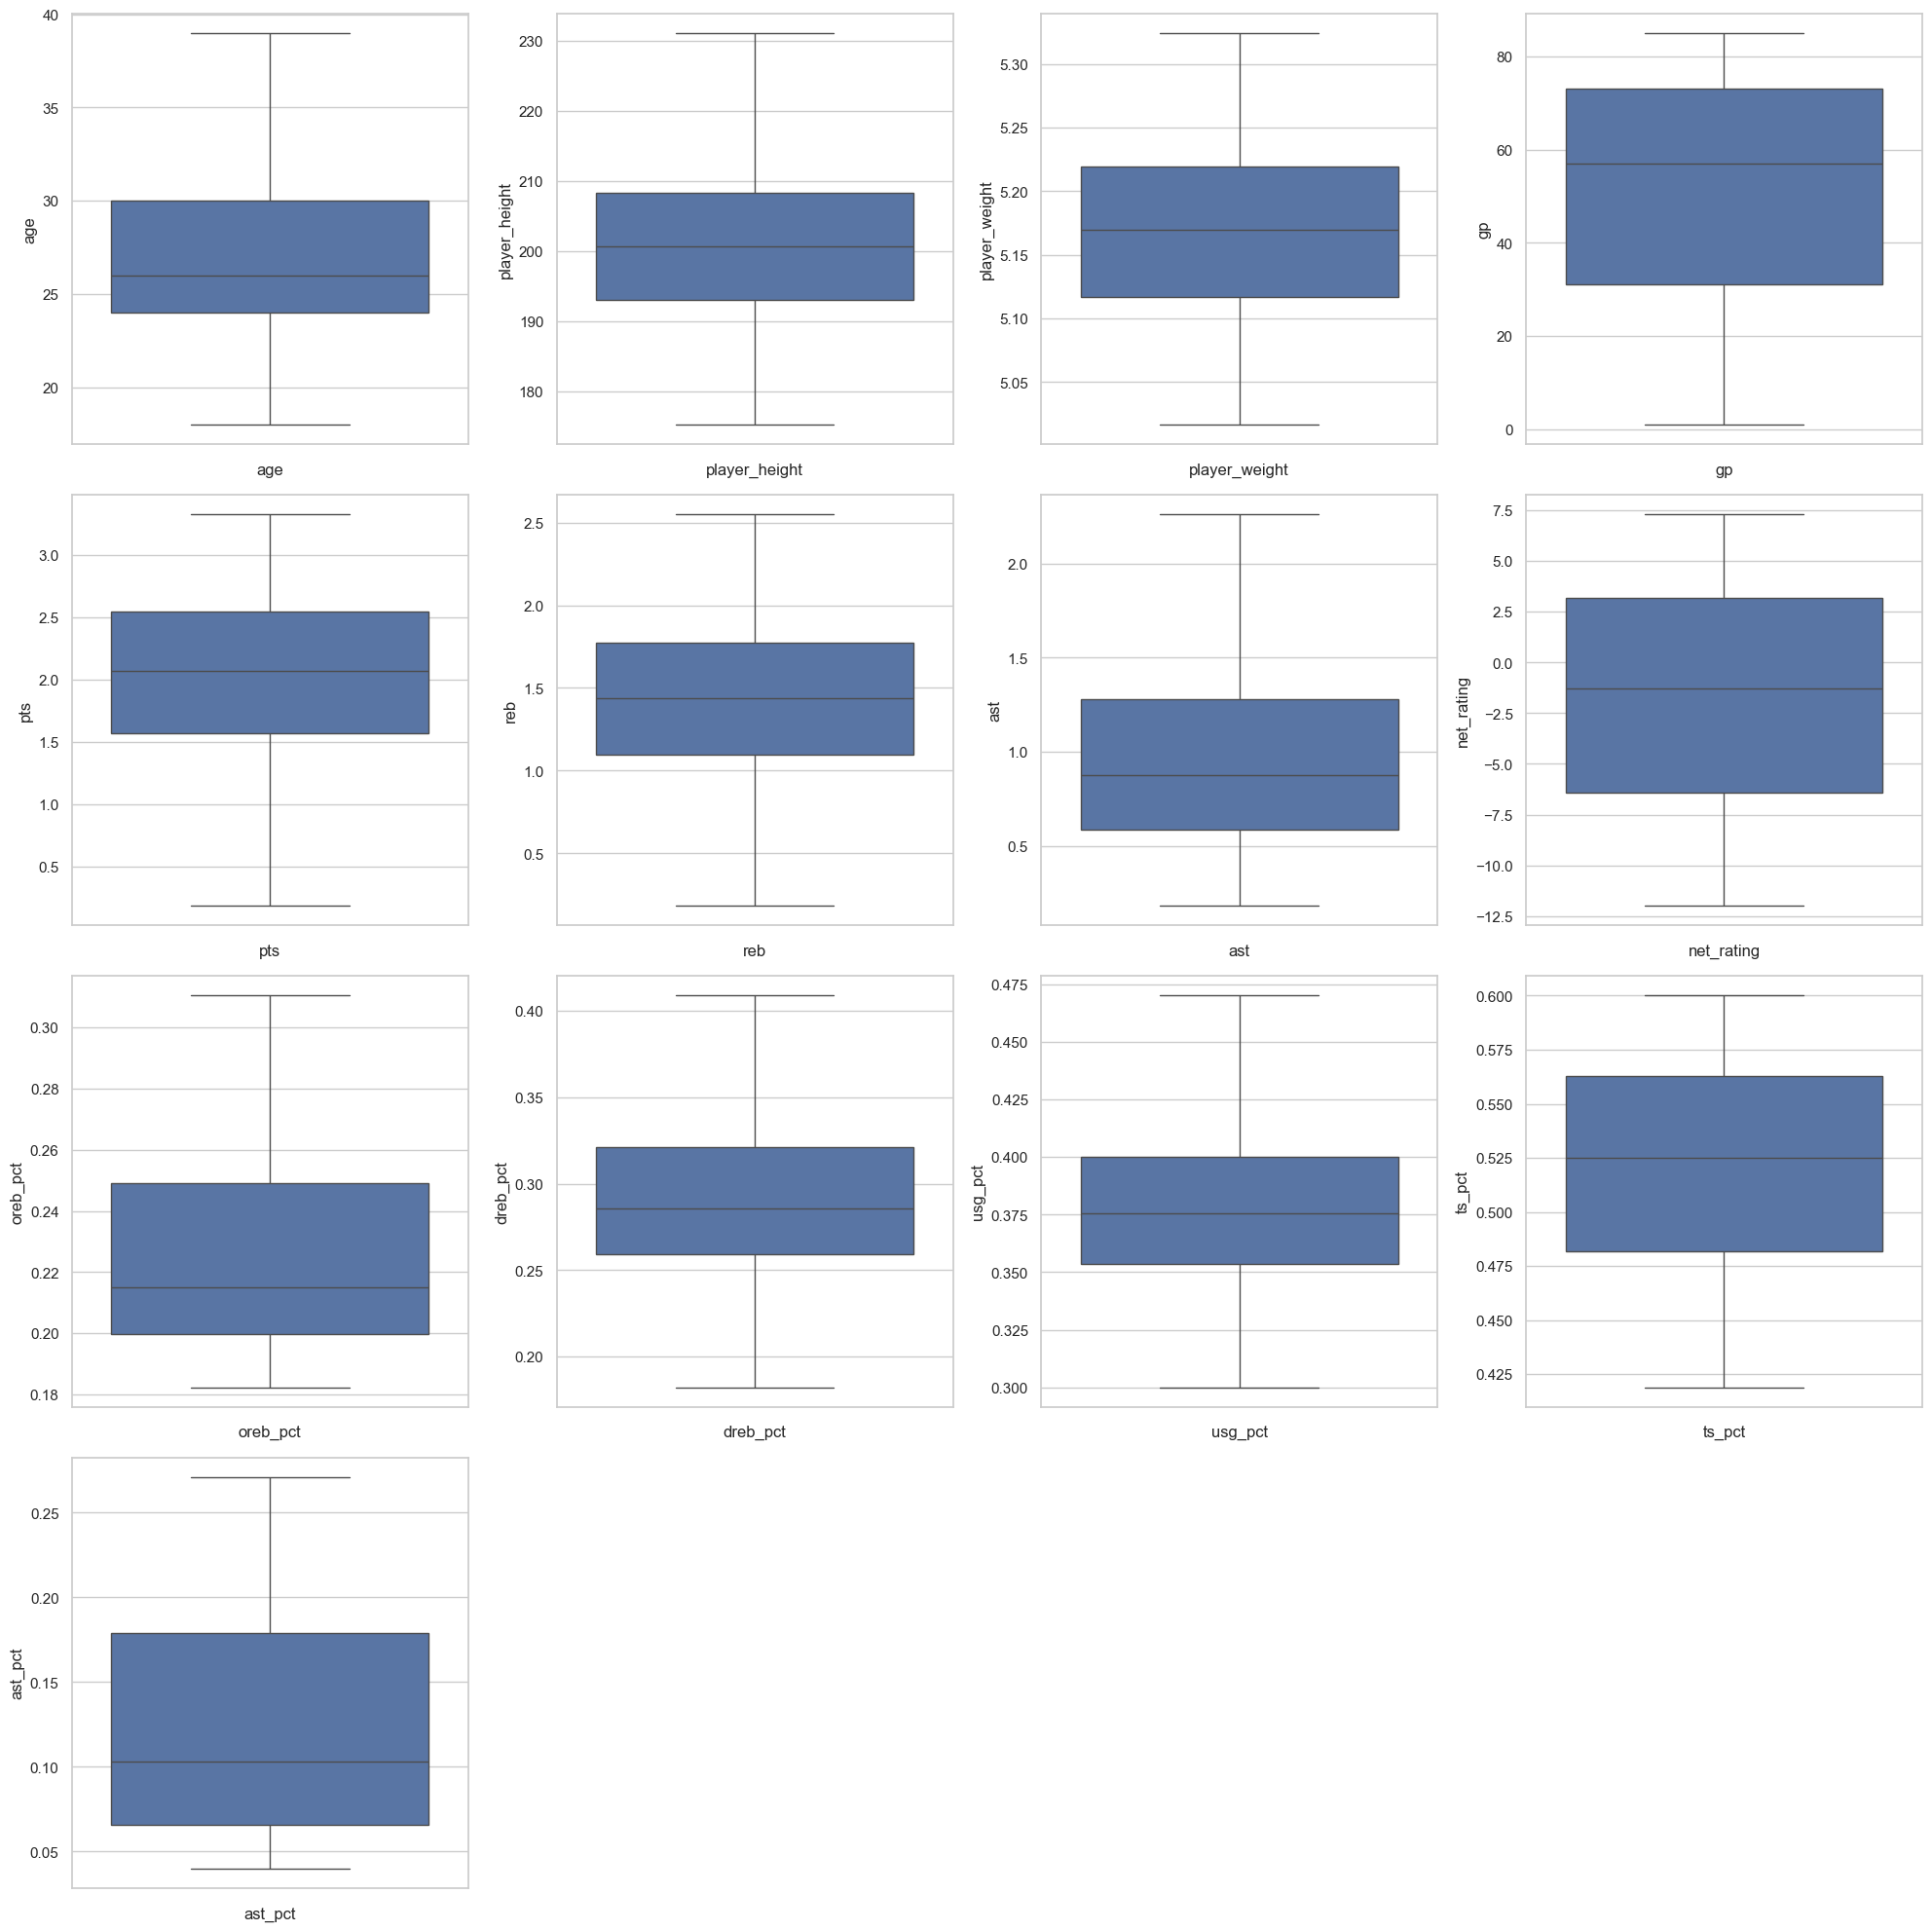

In [29]:
# Although the box plots were plotted in the outlier detection step, we will plot them again.

# Boxplot of the numerical columns:-
plt.figure(figsize=(20, 20))

i = 1
for col in num_cols:
    plt.subplot(4, 4, i)
    sns.boxplot(df_copy[col])
    plt.xlabel(col)
    i += 1
    
plt.tight_layout()
plt.show()

# Multivariate Analysis
- Best scoring seasons of the NBA
- Pair plots to analyze multiple relationships simultaneously.
- Heatmaps to visualize correlations among multiple variables.
- Grouped comparisons to identify combined effects of multiple features.

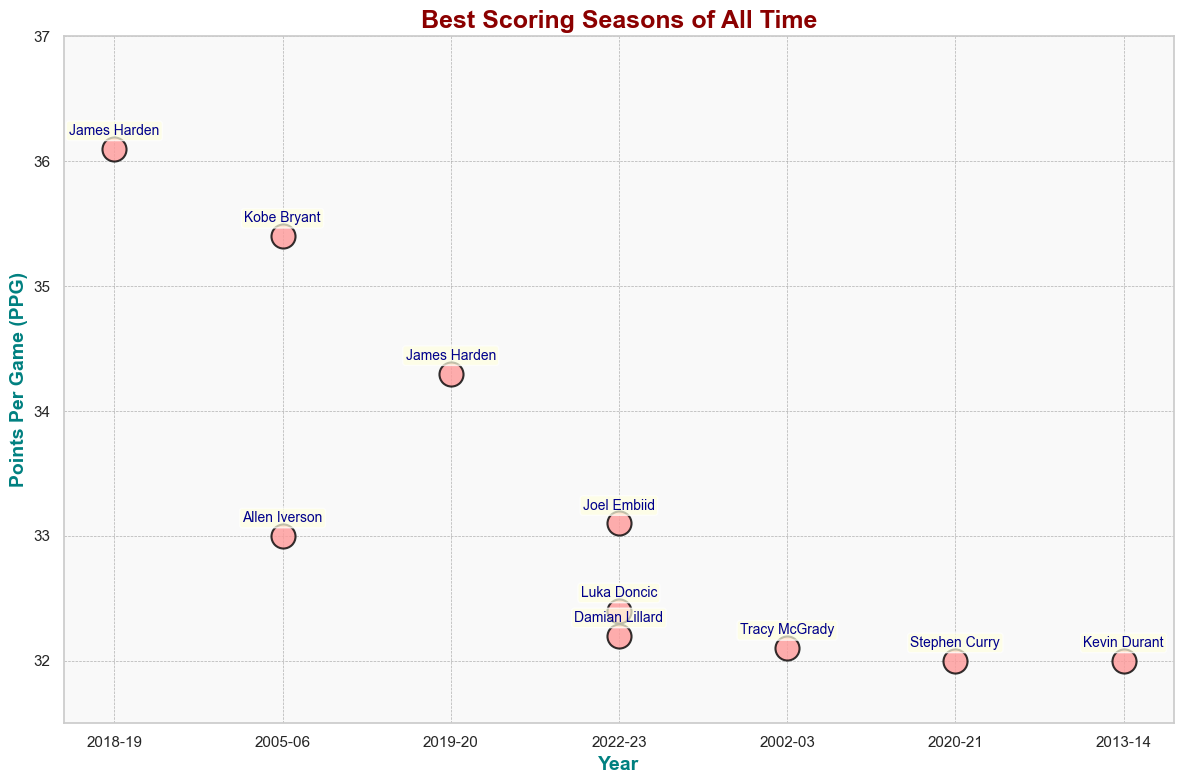

pts   reb  ast draft_number
player_name                                 
James Harden    36.1   6.6  7.5            3
Kobe Bryant     35.4   5.3  4.5           13
James Harden    34.3   6.6  7.5            3
Joel Embiid     33.1  10.2  4.2            3
Allen Iverson   33.0   3.2  7.4            1
Luka Doncic     32.4   8.6  8.0            3
Damian Lillard  32.2   4.8  7.3            6
Tracy McGrady   32.1   6.5  5.5            9
Stephen Curry   32.0   5.5  5.8            7
Kevin Durant    32.0   7.4  5.5            2

In [30]:
# Let's move on to the Multivariate Analysis:-


best_scoring_seasons = df.sort_values(by = ['pts','ast'], ascending = [False,False]).head(10)


plt.figure(figsize=(12, 8))
plt.scatter(
    best_scoring_seasons['season'], 
    best_scoring_seasons['pts'], 
    s=300, 
    color='#FF9999',  # Warm, friendly pink color
    edgecolors='black', 
    linewidth=1.5, 
    alpha=0.8
)

# Adding annotations for players
for i, player in enumerate(best_scoring_seasons['player_name']):
    plt.annotate(
        player, 
        (best_scoring_seasons['season'].iloc[i], best_scoring_seasons['pts'].iloc[i]),
        textcoords="offset points", 
        xytext=(0, 10), 
        ha='center', 
        fontsize=10, 
        color='darkblue', 
        bbox=dict(boxstyle="round,pad=0.2", fc="lightyellow", alpha=0.7)
    )


plt.xlabel('Year', fontsize=14, fontweight='bold', color='teal')
plt.ylabel('Points Per Game (PPG)', fontsize=14, fontweight='bold', color='teal')
plt.title(' Best Scoring Seasons of All Time ', fontsize=18, fontweight='bold', color='darkred')

# Customizing the grid and y-axis for clarity
plt.ylim(31.5, 37.0)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
plt.gca().set_facecolor('#f9f9f9')

# Final touch for better spacing
plt.tight_layout()
plt.show()


best_scoring_seasons[['player_name','pts','reb','ast','draft_number']].set_index('player_name')




<Figure size 1500x1000 with 0 Axes>

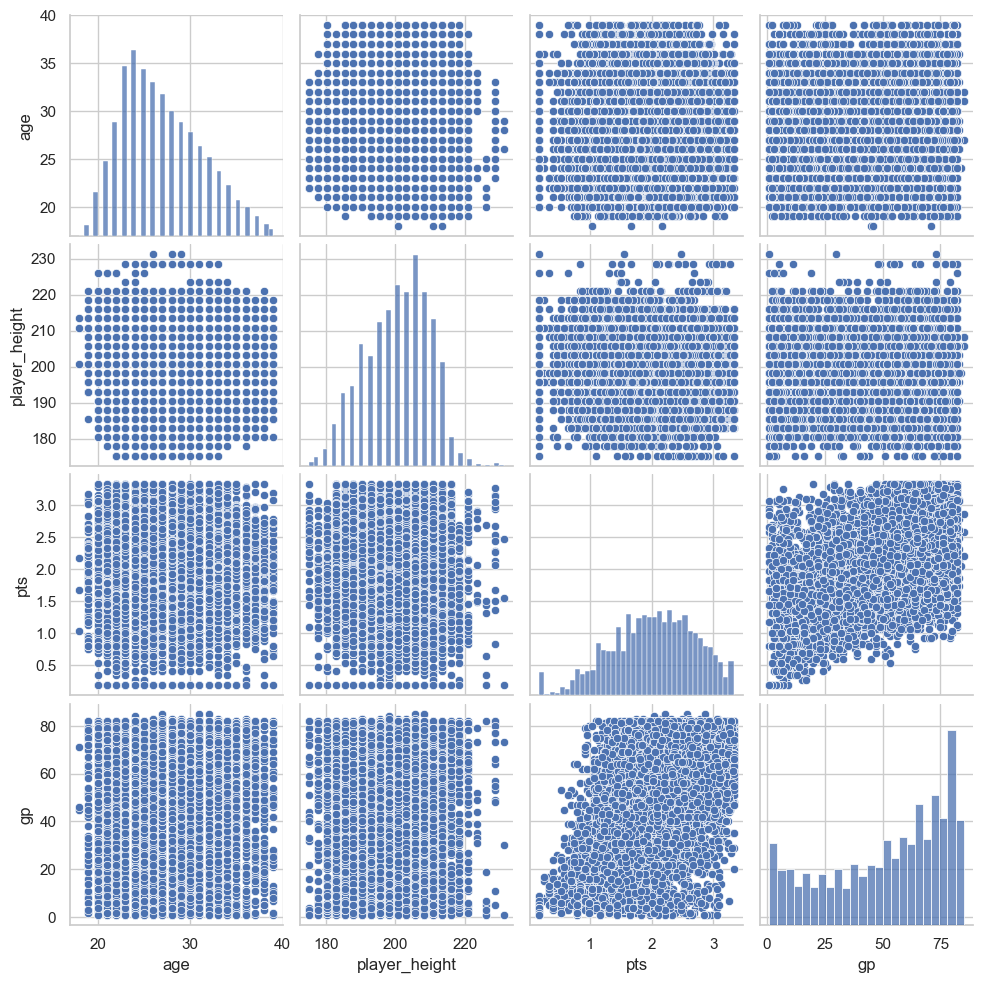

In [31]:
# Multivariate Analysis of Numerical Columns:-
# Pairplot of the numerical columns:-
chosen_cols = ['age', 'player_height', 'pts', 'gp']

plt.figure(figsize=(15, 10))
sns.pairplot(df_copy[chosen_cols])
plt.show()

# As analyzed earlier, the numerical columns are not perfectly linearly correlated, and the pairplot confirms the same.

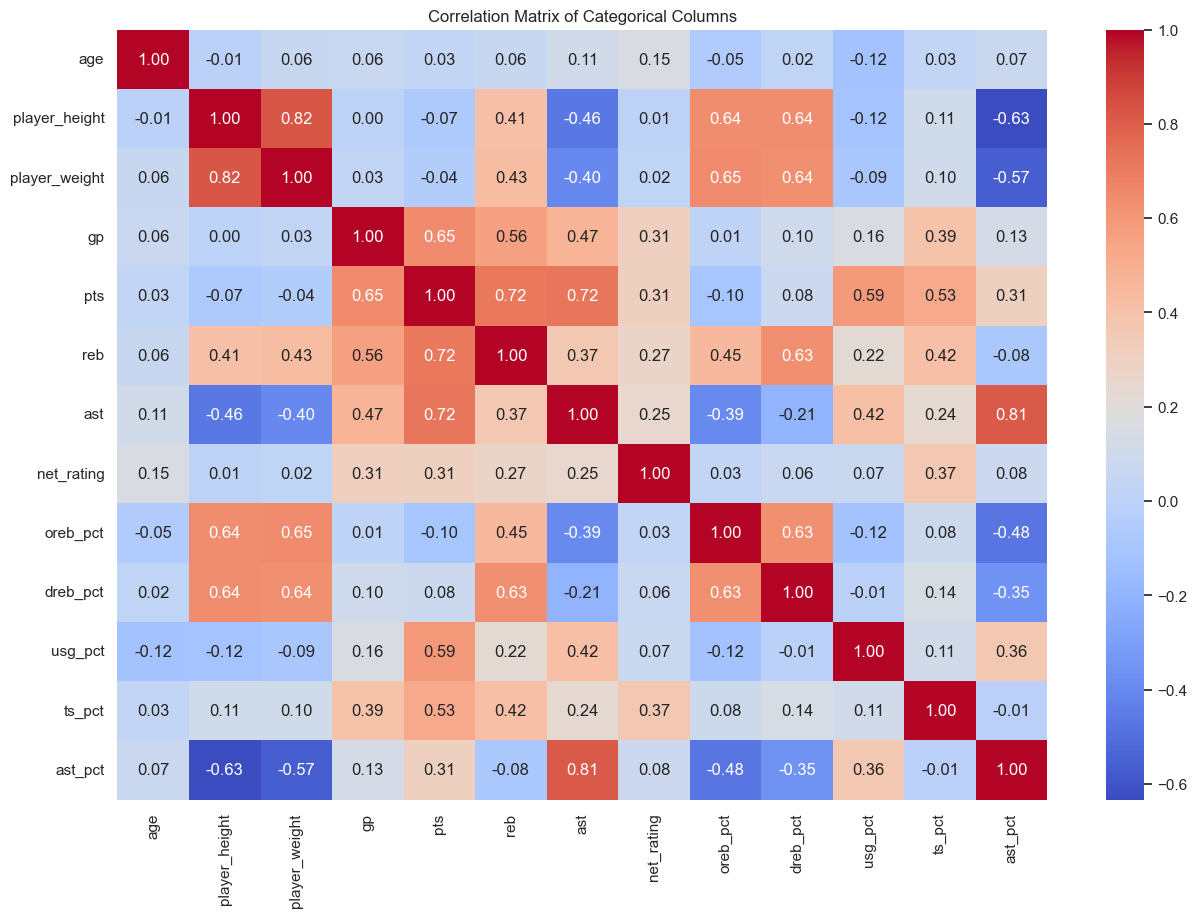

In [32]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_copy[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Categorical Columns")
plt.show()

# As analyzed earlier, the numerical columns are not perfectly linearly correlated, and the heatmap confirms the same.


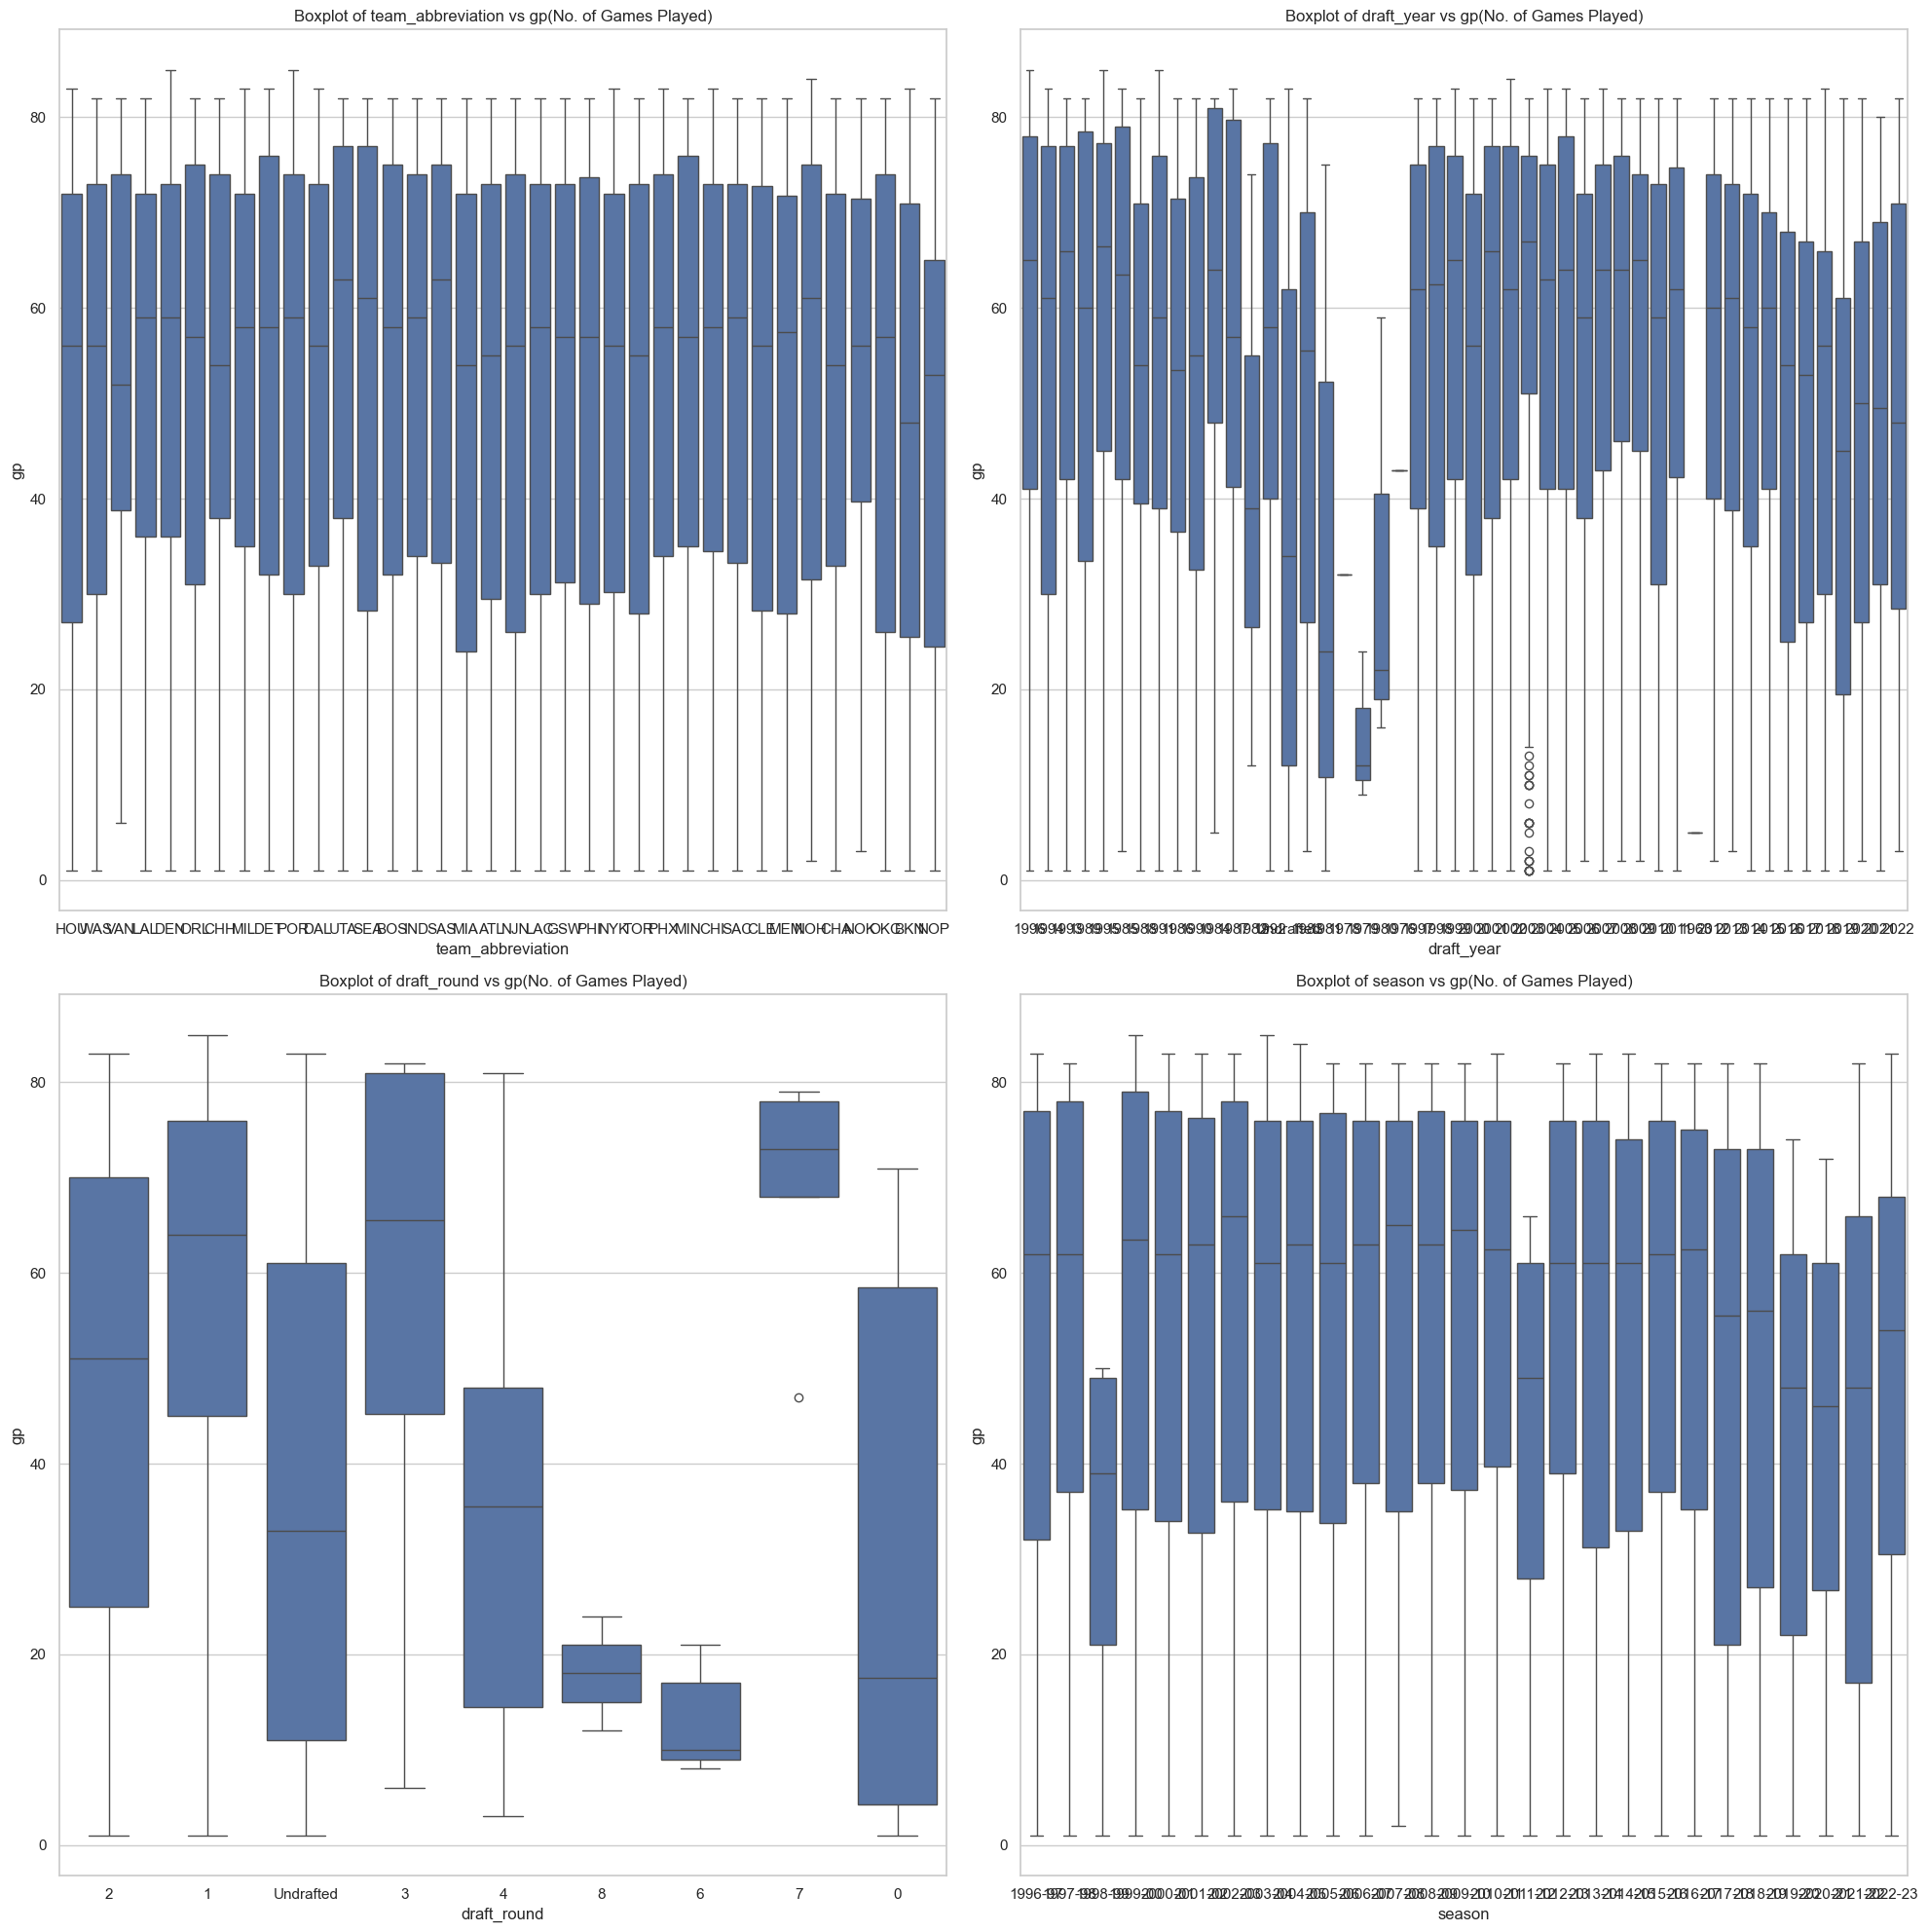

In [33]:
# Combined Multivariate Analysis of Categorical Columns:-
# We will use the boxplot to analyze the relationship between the categorical columns and the numerical column 'gp'(No. of Games Played).

plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='gp', data=df_copy)
    plt.title(f"Boxplot of {col} vs gp(No. of Games Played)")
    i += 1
    
plt.tight_layout()
plt.show()


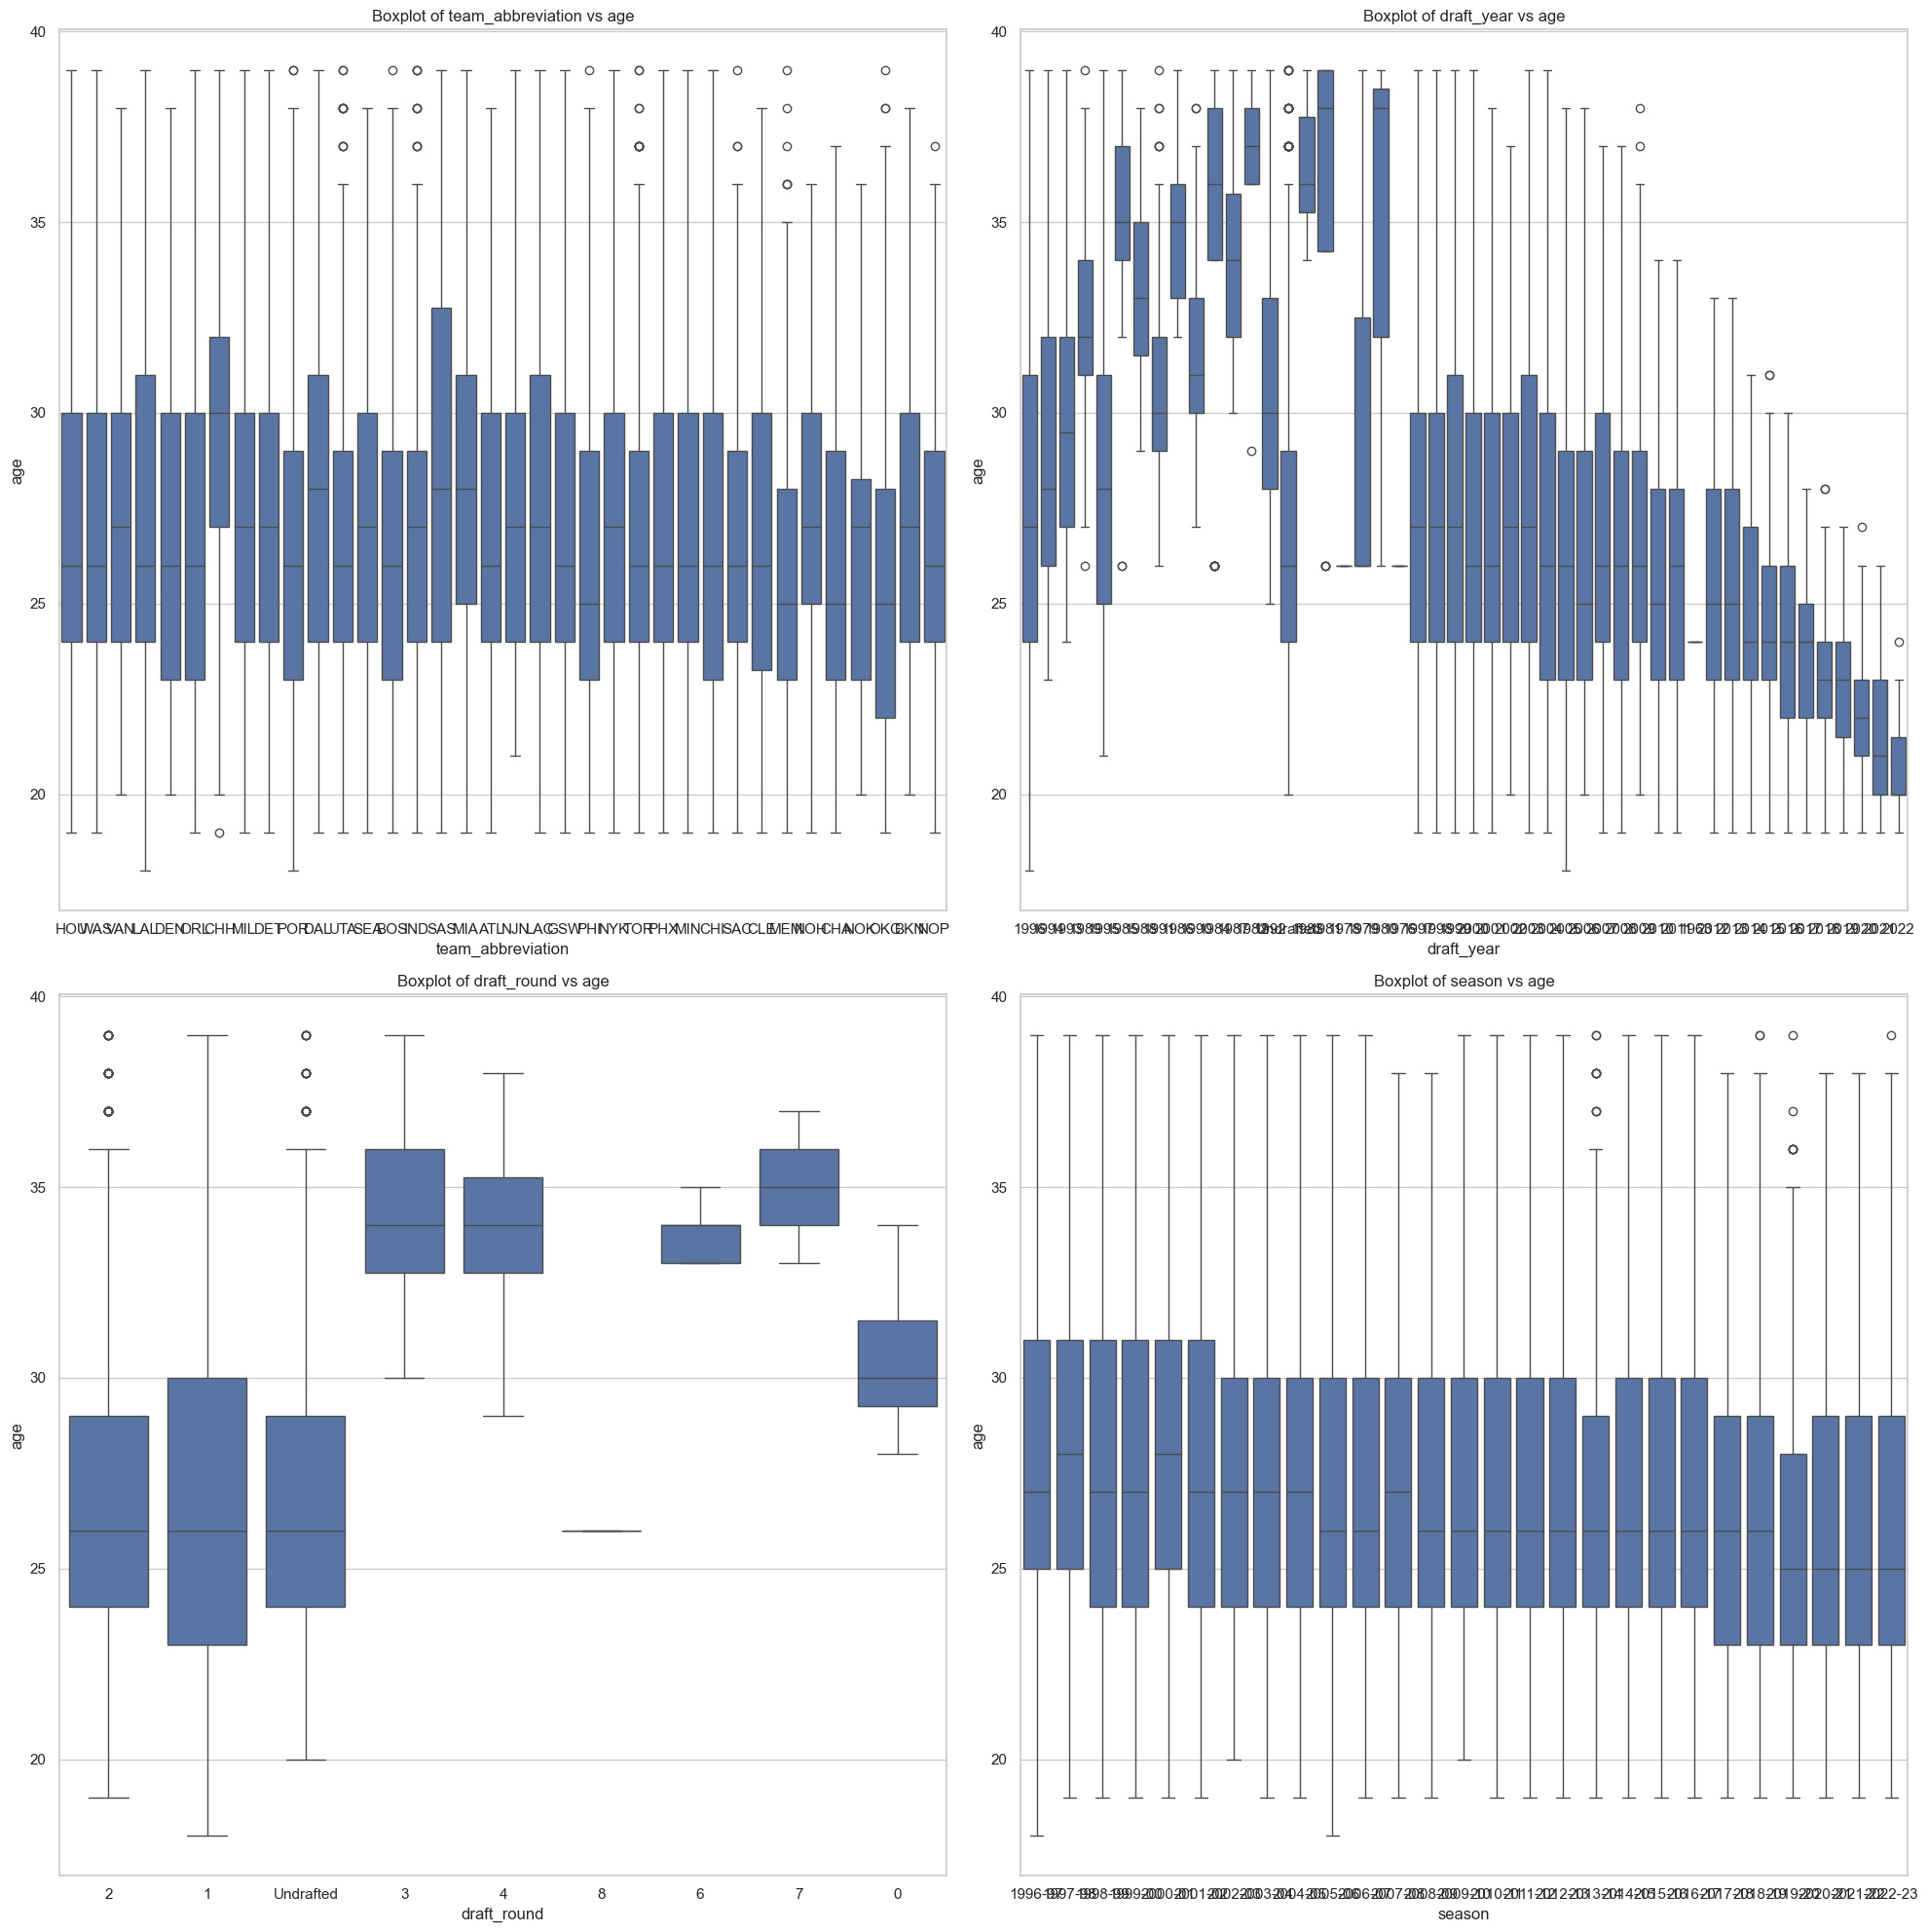

In [34]:
# Combined Multivariate Analysis of Categorical Columns:-
# We will use the boxplot to analyze the relationship between the categorical columns and the numerical column 'age'

plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='age', data=df_copy)
    plt.title(f"Boxplot of {col} vs age")
    i += 1
    
plt.tight_layout()
plt.show()


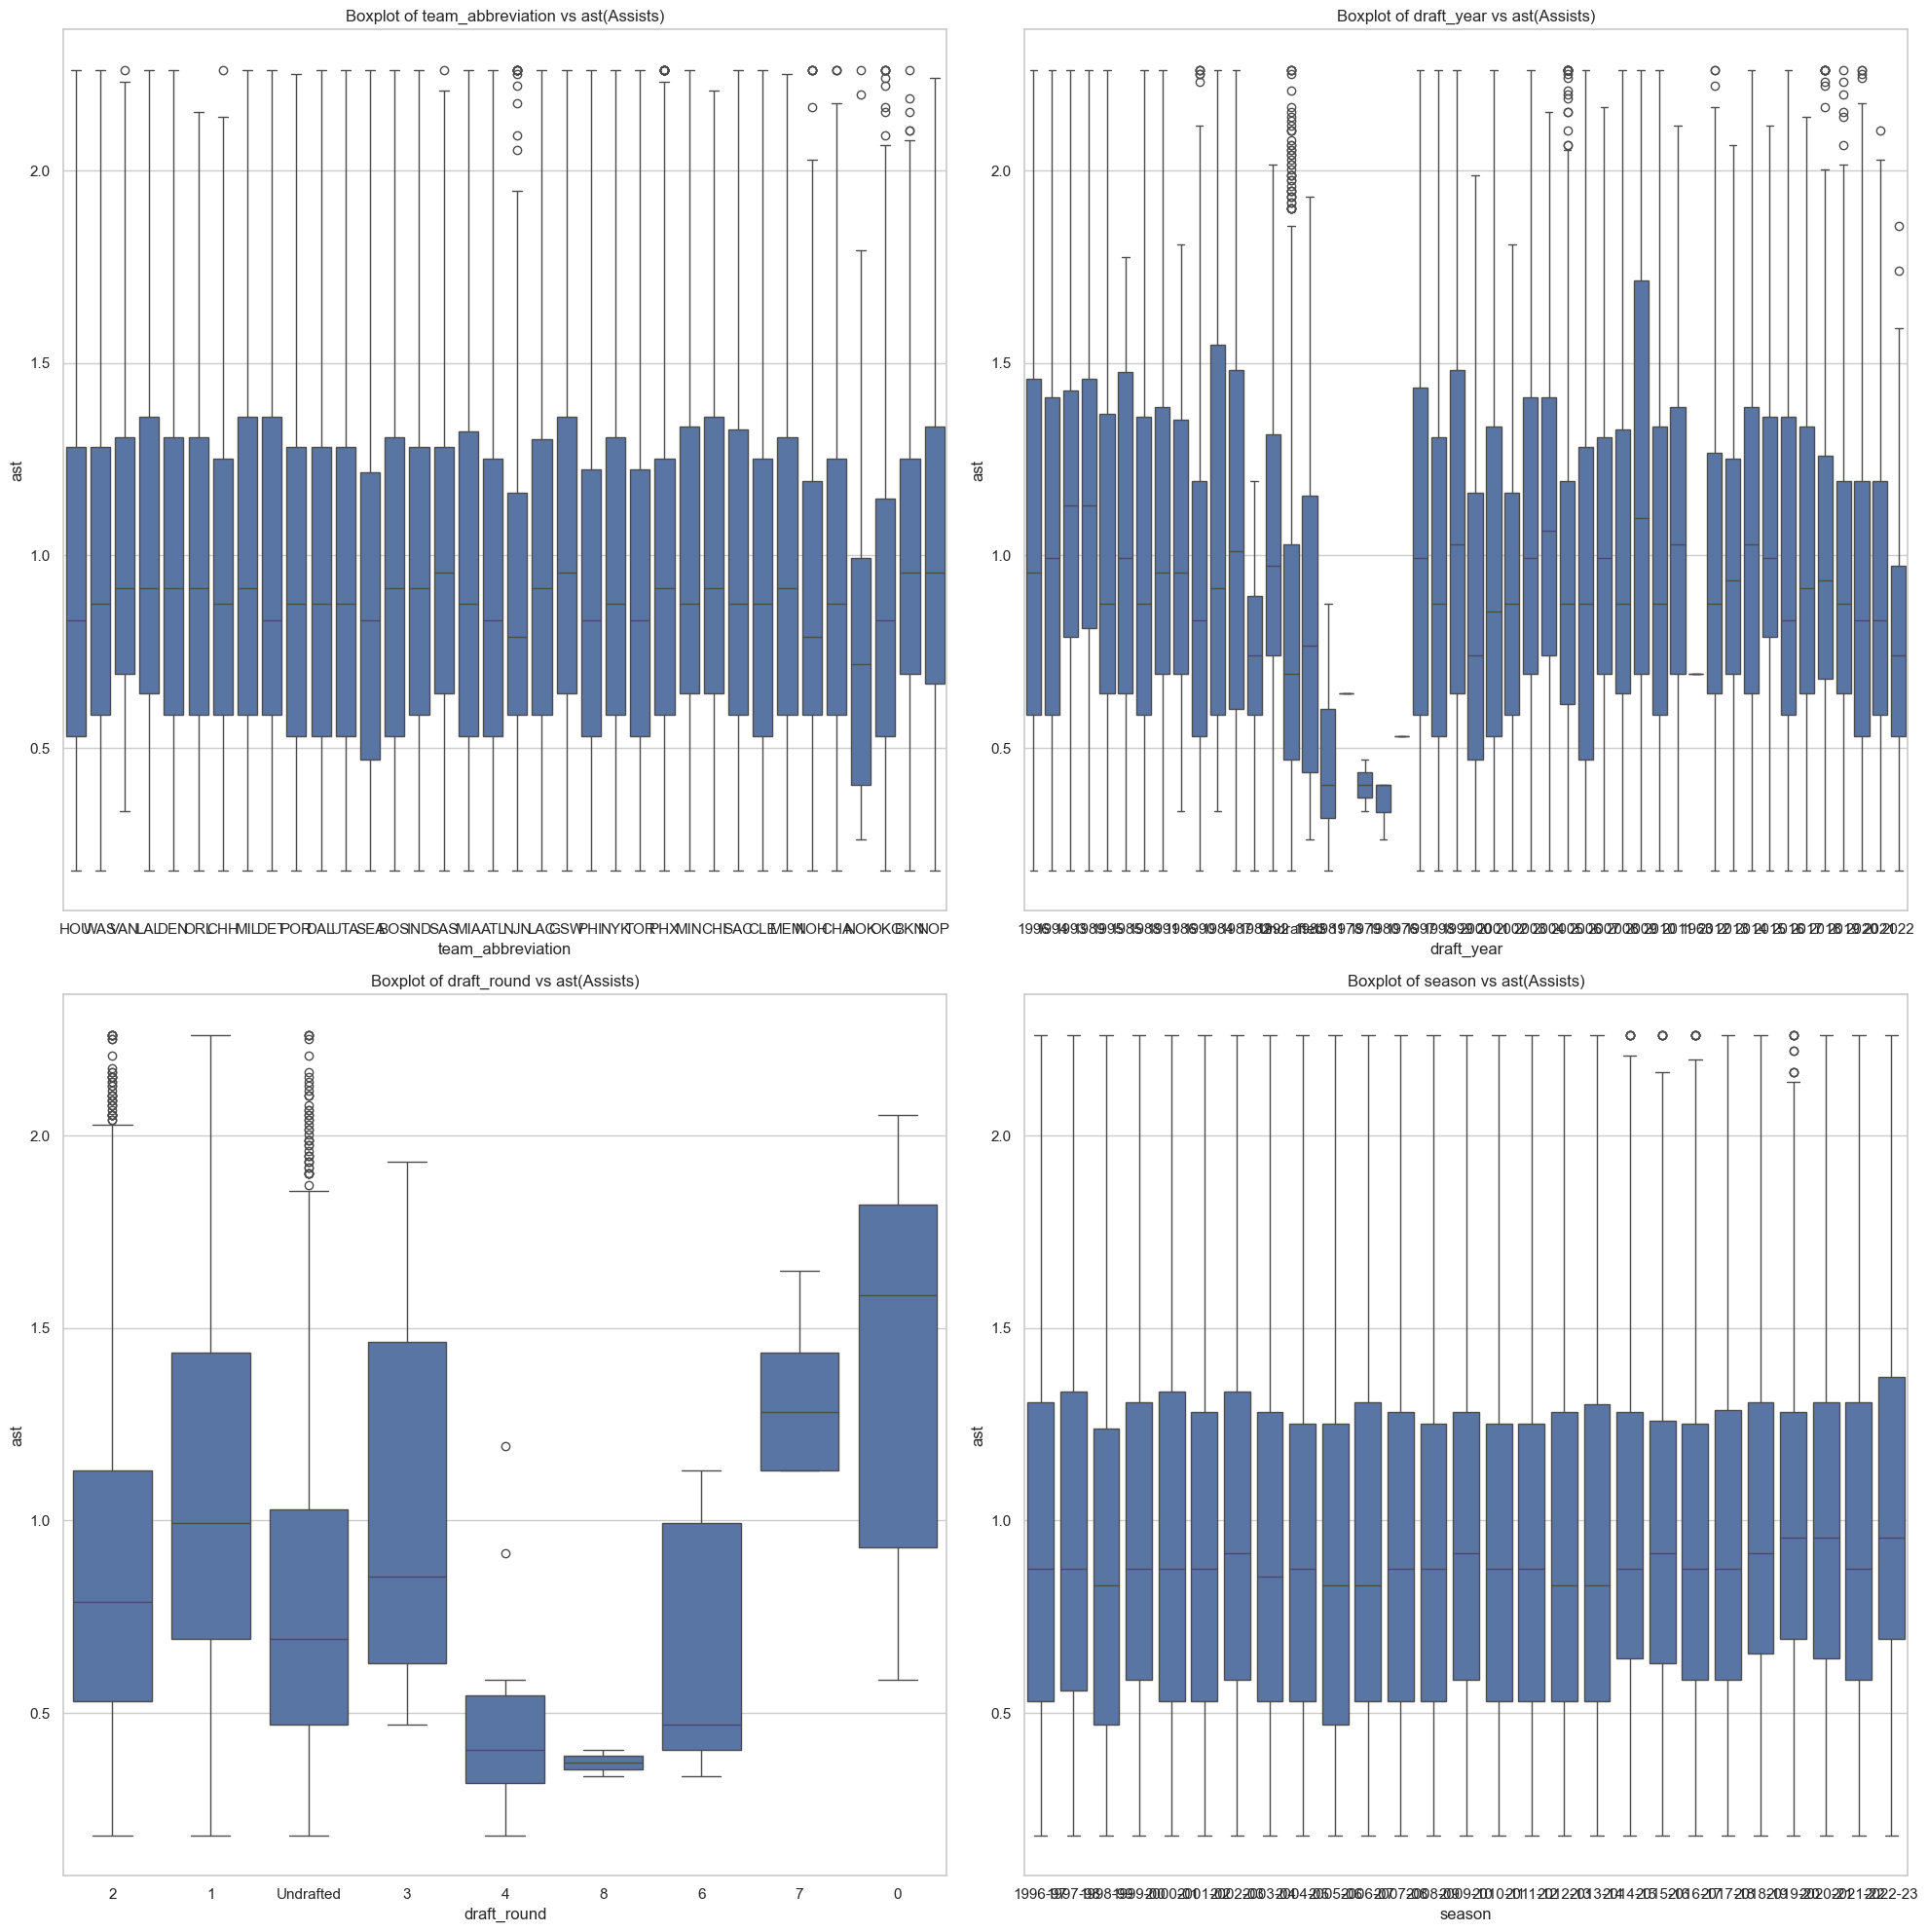

In [35]:
# Combined Multivariate Analysis of Categorical Columns:-
# We will use the boxplot to analyze the relationship between the categorical columns and the numerical column 'ast'

plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='ast', data=df_copy)
    plt.title(f"Boxplot of {col} vs ast(Assists)")
    i += 1
    
plt.tight_layout()
plt.show()


In [36]:
# The boxplots again like before suggest that the categorical columns are not perfectly linearly correlated with the numerical columns.